# Parameters

In [1772]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

In [1773]:
from numpy import conjugate as conj

In [1864]:
sqrt2=np.sqrt(2)

#Parameters

Theta = np.pi/2    #np.random.rand()
Phi   = 0          #np.random.rand()

#-----------------------------------------------------------------------------------------------------

Psi_0=zeros((4,1),dtype=complex_)
Psi_0[0][0]=cos(Theta/2)
Psi_0[1][0]=sin(Theta/2)*exp(1j*Phi)


Psi_0_adj=transpose(conjugate(Psi_0))

#--------------------------------


#Number of atoms

N=1000000


#Basic parameters

gR=1

KapR= 15*gR*sqrt(( (cos(Theta/2))**2 )*N)

gL=1

KapL= 15*gL*sqrt(( (sin(Theta/2))**2 )*N)



### Complex Drivings

fractionRx=0.95
fractionRy=0.95
fractionLx=0
fractionLy=0



# Detuning



DeltaR=0 *gR*sqrt(( (cos(Theta/2))**2 )*N)   
DeltaL=0 *gL*sqrt(( (sin(Theta/2))**2 )*N)   








#Parameters




chiR=DeltaR*(gR**2)/(DeltaR**2+(KapR/2)**2+1e-10)
chiL=DeltaL*(gL**2)/(DeltaL**2+(KapL/2)**2+1e-10)



GammaR=KapR*(gR**2)/(DeltaR**2+(KapR/2)**2+1e-10)
GammaL=KapL*(gR**2)/(DeltaR**2+(KapR/2)**2+1e-10)


# Critical frequencies


Omega_cR=(N* (cos(Theta/2))**2 /2 ) * np.sqrt( GammaR**2 + 4* chiR**2 )
Omega_cL=(N* (sin(Theta/2))**2 /2 ) * np.sqrt( GammaL**2 + 4* chiL**2 )

OmegaR=fractionRx*Omega_cR
OmegaL=fractionLx*Omega_cL







#Magnetic fields

fractionBe=0.0
fractionBg=0.0


Be=fractionBe*Omega_cR 
Bg=fractionBg*Omega_cL



#Dephasing

Ca=0.00*Omega_cR 
Cb=0.00*Omega_cL



print(chiR,chiL,OmegaR,OmegaL,GammaR,GammaL)


0.0 0.0 89.56685895029602 0.0 0.0003771236166328253 0.0003771236166328253


In [1865]:
print(Omega_cR,Theta,Phi)

94.28090415820634 1.5707963267948966 0


# Time

In [1866]:
T1=1000
c_fact=1


tng=T1/(4*Omega_cR )   #This 4 is due to the 2 factor in the formula Omega_c and the cos(45deg)**2


t_final=tng*1.6  #*2 +0.05*  2*np.pi/c_fact


print(4*Omega_cR *t_final,tng)


1600.0000000000002 2.6516504294495533


In [1867]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import sqrt

import time
from numba import jit




from scipy.sparse import identity
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix


# Definition of Dicke-Generalized States

import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt


#--------------------------------------

State_List=[]

import scipy.special





import time 

import itertools
from itertools import permutations
from numba import jit


In [1868]:
pip install sdeint

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\camil\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1870]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS,itoEuler
from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)



def _check_args(f, G, y0, tspan, dW=None, IJ=None):
    """Do some validation common to all algorithms. Find dimension d and number
    of Wiener processes m.
    """
    if not np.isclose(min(np.diff(tspan)), max(np.diff(tspan))):
        raise SDEValueError('Currently time steps must be equally spaced.')
    # Be flexible to allow scalar equations. convert them to a 1D vector system
    if isinstance(y0, numbers.Number):
        if isinstance(y0, numbers.Integral):
            numtype = np.float64
        else:
            numtype = type(y0)
        y0_orig = y0
        y0 = np.array([y0], dtype=numtype)
        def make_vector_fn(fn):
            def newfn(y, t):
                return np.array([fn(y[0], t)], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        def make_matrix_fn(fn):
            def newfn(y, t):
                return np.array([[fn(y[0], t)]], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        if isinstance(f(y0_orig, tspan[0]), numbers.Number):
            f = make_vector_fn(f)
        if isinstance(G(y0_orig, tspan[0]), numbers.Number):
            G = make_matrix_fn(G)
    # determine dimension d of the system
    d = len(y0)
    if len(f(y0, tspan[0])) != d:
        raise SDEValueError('y0 and f have incompatible shapes.')
    message = """y0 has length %d. So G must either be a single function
              returning a matrix of shape (%d, m), or else a list of m separate
              functions each returning a column of G, with shape (%d,)""" % (
                  d, d, d)
    if callable(G):
        # then G must be a function returning a d x m matrix
        Gtest = G(y0, tspan[0])
        if Gtest.ndim != 2 or Gtest.shape[0] != d:
            raise SDEValueError(message)
        # determine number of independent Wiener processes m
        m = Gtest.shape[1]
    else:
        # G should be a list of m functions g_i giving columns of G
        G = tuple(G)
        m = len(G)
        Gtest = np.zeros((d, m))
        for k in range(0, m):
            if not callable(G[k]):
                raise SDEValueError(message)
            Gtestk = G[k](y0, tspan[0])
            if np.shape(Gtestk) != (d,):
                raise SDEValueError(message)
            Gtest[:,k] = Gtestk
    message = """From function G, it seems m==%d. If present, the optional
              parameter dW must be an array of shape (len(tspan)-1, m) giving
              m independent Wiener increments for each time interval.""" % m
    if dW is not None:
        if not hasattr(dW, 'shape') or dW.shape != (len(tspan) - 1, m):
            raise SDEValueError(message)
    message = """From function G, it seems m==%d. If present, the optional
              parameter I or J must be an array of shape (len(tspan)-1, m, m)
              giving an m x m matrix of repeated integral values for each
              time interval.""" % m
    if IJ is not None:
        if not hasattr(IJ, 'shape') or IJ.shape != (len(tspan) - 1, m, m):
            raise SDEValueError(message)
    return (d, m, f, G, y0, tspan, dW, IJ)





theta = Theta
phi   = Phi


steps1=400000  #10000000 

tf=t_final
t_alt = np.linspace(0,tf,steps1)

print(tf/steps1,N*GammaR*t_final,t_final)    

1.0606601717798214e-05 1600.0 4.242640687119286


In [1871]:
sqrt2=np.sqrt(2)
sqrt3=np.sqrt(3)
sqrt6=np.sqrt(6)
sqrt12=np.sqrt(12)

In [1872]:
matrix_array=[]

# X matrix


f10x=zeros((4, 4),dtype=complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+transpose(f10x)
matrix_array.append(f10x)

f20x=zeros((4, 4),dtype=complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+transpose(f20x)
matrix_array.append(f20x)

f30x=zeros((4, 4),dtype=complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+transpose(f30x)
matrix_array.append(f30x)

f21x=zeros((4, 4),dtype=complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+transpose(f21x)
matrix_array.append(f21x)

f31x=zeros((4, 4),dtype=complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+transpose(f31x)
matrix_array.append(f31x)

f32x=zeros((4, 4),dtype=complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=zeros((4, 4),dtype=complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=zeros((4, 4),dtype=complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=zeros((4, 4),dtype=complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=zeros((4, 4),dtype=complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=zeros((4, 4),dtype=complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=zeros((4, 4),dtype=complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+conjugate(np.transpose(f32y))
matrix_array.append(f32y)



#Z matrix


f0z=np.zeros((4, 4),dtype=complex_)
f0z[0][0]=1
#matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=complex_)
f1z[1][1]=1
#matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=complex_)
f2z[2][2]=1
#matrix_array.append(f2z)


f3z=np.zeros((4, 4),dtype=complex_)
f3z[3][3]=1




# Gell-Mann type matrices

f01z=np.zeros((4, 4),dtype=complex_)
f01z[0][0]= 1/sqrt2
f01z[1][1]=-1/sqrt2
matrix_array.append(f01z)


f012z=np.zeros((4, 4),dtype=complex_)
f012z[0][0]= 1/sqrt6
f012z[1][1]= 1/sqrt6
f012z[2][2]=-2/sqrt6
matrix_array.append(f012z)


f0123z=np.zeros((4, 4),dtype=complex_)
f0123z[0][0]= 1/sqrt12
f0123z[1][1]= 1/sqrt12
f0123z[2][2]= 1/sqrt12
f0123z[3][3]=-3/sqrt12
matrix_array.append(f0123z)



#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(matmul(Psi_0_adj,matmul(j,Psi_0))[0][0])

    

Cov_mat=zeros((15, 15),dtype=complex_)

for i in range(15):
    for j in range(15):
        Cov_mat[i][j]=0.5*(matmul(Psi_0_adj,matmul( matmul(matrix_array[i],matrix_array[j])+matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        

Cov_mat_list=[]

for j in range(15):
    Cov_mat_list.append(list(real(Cov_mat[j])))    
    

from scipy import stats

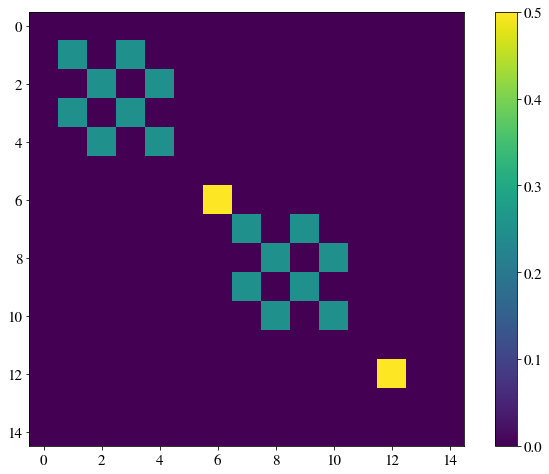

In [1873]:

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.real(Cov_mat))
plt.colorbar()
plt.show()

In [1876]:

Stand_Be=Omega_cR 
Stand_Bg=Omega_cR 
fraction_time=1  #/3



@jit

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

def f(y, t):


    def Fraction_con_cos(t):
    
        Driving_bef  =fractionRx
        Driving_after=fractionRx
        Driving_fin  =0
    
    
        if t< tng:
            return Driving_bef
        elif tng<=t<=tng*1.25:
            return Driving_after *np.cos(c_fact*(t-tng))
        else:
            return Driving_fin


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



    def Fraction_con_sin(t):
    
        Driving_bef1  =0.0
        Driving_after1=fractionRx
    
        if t< tng:
            return Driving_bef1

        elif tng<=t<=tng*1.25:
            return Driving_after1 *np.sin(c_fact*(t-tng))

        else:
            return 0          

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


    def Be(t):
    
        Be_bef  =0
        Be_after=0
    
    
        if t< tng*fraction_time:
            return Be_bef
        else:
            return Be_after



#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


    def Bg(t):
    
        Bg_bef  =0
        Bg_after=0
    
    
        if t< tng*fraction_time:
            return Bg_bef
        else:
            return Bg_after



#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


    def Caf(t):

        if t< tng:
            return 0.0 
        else:
            return 0*   Omega_cR    #*Val_Omega_cR


    def Cbf(t):

        if t< tng:
            return 0 
        else:
            return 0.0   #*Val_Omega_cR

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    Ca=Caf(t)
    Cb=Cbf(t)

      
    alpRx=y[15]
    alpRy=y[16]
    alpLx=y[17]
    alpLy=y[18]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    #s0z=y[12]   #z0
    #s1z=y[13]   #z1
    #s2z=y[14]   #z2
    
    
    
    s0 =y[12]   #Gell-Mann type 0
    s1 =y[13]   #Gell-Mann type 1
    s2 =y[14]   #Gell-Mann type 2


    ### Complex Drivings



    #fractionLx=0
    #fractionLy=0



    OmegaR    = Fraction_con_cos(t)*Omega_cR  
    OmegaR_im = Fraction_con_sin(t)*Omega_cR 

    OmegaL    = 0*Fraction_con_cos(t)*Omega_cR 
    OmegaL_im = 0*Fraction_con_sin(t)*Omega_cR 
    

    Be=Be(t)    #Magnetic field excited states
    Bg=Bg(t)    #Magnetic field ground states

    #print(OmegaR,OmegaR_im,OmegaL,OmegaL_im,N*GammaR*t)
    
    ##### (N-s2z-s1z-2*s0z)=s3z-s0z=-s0/sqrt2-s1/sqrt6-2*s2/sqrt3

    ##### (s2z-s1z)                =s0/sqrt2-3*s1/sqrt6
    
    ##############
    
    
    Difs3zs0z=-s0/sqrt2-s1/sqrt6-2*s2/sqrt3
    Difs2zs1z=s0/sqrt2-3*s1/sqrt6
    Difs3zs2z=sqrt6*s1/3-(2*sqrt3/3)*s2
    
    
    dalpRxdt = -DeltaR*alpRy-(KapR/2)*alpRx+(gR/sqrt2)*s30y        
    dalpRydt =  DeltaR*alpRx-(KapR/2)*alpRy-(gR/sqrt2)*s30x
    dalpLxdt = -DeltaL*alpLy-(KapL/2)*alpLx+(gL/sqrt2)*s21y 
    dalpLydt =  DeltaL*alpLx-(KapL/2)*alpLy-(gL/sqrt2)*s21x 
         
      
        
    ds10xdt  = (-gR)*(-alpRx*s31y+alpRy*s31x) +(OmegaR/2)*s31y-\
        gL*(-alpLx*s20y+alpLy*s20x)+(OmegaL/2)*s20y  -(1/2)*(OmegaR_im*s31x+OmegaL_im*s20x)
            
    ds20xdt  = (-gR)*(-alpRx*s32y+alpRy*s32x) +(OmegaR/2)*s32y+\
        gL*(alpLx*s10y+alpLy*s10x)+(OmegaL/2)*s10y     -(1/2)*(OmegaR_im*s32x-OmegaL_im*s10x)+(Be*s30y-Bg*s21y)/2   +Ca*s20y
            
    ds30xdt  = (-sqrt2*gR)*alpRy*Difs3zs0z             +OmegaR_im*(-Difs3zs0z)/sqrt2+(Be*s20y-Bg*s31y)/2   +Cb*s30y
            
    ds21xdt  = (-sqrt2*gL)*alpLy*Difs2zs1z             +OmegaL_im*(-Difs2zs1z)/sqrt2+(Be*s31y-Bg*s20y)/2   +Ca*s21y
            
    ds31xdt  = gR*(alpRy*s10x-alpRx*s10y)+(-OmegaR/2)*s10y-\
        gL*(alpLx*s32y+alpLy*s32x)+(-OmegaL/2)*s32y   +(1/2)*(OmegaR_im*s10x-OmegaL_im*s32x)  +(Be*s21y-Bg*s30y)/2   +Cb*s31y
            
    ds32xdt  = gR*(-alpRx*s20y+alpRy*s20x)+(-OmegaR/2)*s20y+\
        gL*(-alpLx*s31y+alpLy*s31x)+(-OmegaL/2)*s31y  +(1/2)*(OmegaR_im*s20x+OmegaL_im*s31x)   +(Cb-Ca)*s32y


        
    ds10ydt  = (gR)*(alpRx*s31x+alpRy*s31y)+(OmegaR/2)*s31x-\
        gL*(alpLx*s20x+alpLy*s20y)-(OmegaL/2)*s20x    +(1/2)*(OmegaR_im*s31y-OmegaL_im*s20y)+Bg*(-sqrt2*s0 )/sqrt2
        
    ds20ydt  = (gR)*(alpRx*s32x+alpRy*s32y)+(OmegaR/2)*s32x-\
        gL*(alpLx*s10x-alpLy*s10y)+(-OmegaL/2)*s10x   +(1/2)*(OmegaR_im*s32y+OmegaL_im*s10y)+(Bg*s21x-Be*s30x)/2   -Ca*s20x

    ds30ydt  = (2*gR*alpRx+OmegaR)*(Difs3zs0z)/sqrt2+(Bg*s31x-Be*s20x)/2   -Cb*s30x
                
    ds21ydt  = (2*gL*alpLx+OmegaL)*(Difs2zs1z)/sqrt2 +(Bg*s20x-Be*s31x)/2   -Ca*s21x 
        
    ds31ydt  = - gR*(alpRx*s10x+alpRy*s10y)-(OmegaR/2)*s10x+\
        gL*(alpLx*s32x-alpLy*s32y)+(OmegaL/2)*s32x    -(1/2)*(OmegaR_im*s10y+OmegaL_im*s32y)+(Bg*s30x-Be*s21x)/2   -Cb*s31x
            
    ds32ydt  = (-gR)*(alpRx*s20x+alpRy*s20y)-(OmegaR/2)*s20x+\
        gL*(alpLx*s31x+alpLy*s31y)+(OmegaL/2)*s31x    +(1/2)*(-OmegaR_im*s20y+OmegaL_im*s31y)+Be*Difs3zs2z/sqrt2   -(Cb-Ca)*s32x
        
    ds0zdt   =  ( sqrt2)*(gR*( alpRx*s30y-alpRy*s30x) + (OmegaR/2)*s30y )   -OmegaR_im*s30x/sqrt2 +Bg*s10y/sqrt2
    ds1zdt   =  ( sqrt2)*(gL*( alpLx*s21y-alpLy*s21x) + (OmegaL/2)*s21y )   -OmegaL_im*s21x/sqrt2 -Bg*s10y/sqrt2      
    ds2zdt   =  (-sqrt2)*(gL*(-alpLy*s21x+alpLx*s21y) + (OmegaL/2)*s21y )   +OmegaL_im*s21x/sqrt2 +Be*s32y/sqrt2
    ds3zdt   = -ds0zdt         
    
    
    ds0dt    = (ds0zdt-ds1zdt)/sqrt2
    ds1dt    = (ds0zdt+ds1zdt-2*ds2zdt)/sqrt6    
    ds2dt    = (ds0zdt+ds1zdt+ds2zdt-3*ds3zdt)/sqrt12    


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0dt,ds1dt,ds2dt,dalpRxdt,dalpRydt,dalpLxdt,dalpLydt]
    return array(dzdt)
    
@jit

def GG(y, t):
    Arr=zeros((1,19))
    Arr[0][-1]=1
    Arr[0][-2]=1
    Arr[0][-3]=1
    Arr[0][-4]=1
    
    return diag(Arr[0])


In [1877]:
@jit

def random_vect(KapR=KapR,KapL=KapL):
    Hu=np.zeros((1,19))
    Hu[0][-1]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-2]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-3]=np.sqrt(KapR/4)*np.random.normal()
    Hu[0][-4]=np.sqrt(KapR/4)*np.random.normal()
    
    return Hu



In [1878]:
inv_frac=1200

Major_index=int(steps1/inv_frac)
#New_column=zeros((steps1//Major_index, int(15*16/2)))
New_column=zeros((steps1//Major_index, int(30)))




def partit(number,array):
    j=0
    dis=len(array)
    result=[]
    while j*number<dis:
        result.append(array[j*number])
        j=j+1
    return result






t_reduced=np.zeros((1,steps1//Major_index))

for j in range(steps1//Major_index):
    t_reduced[0][j]=t_alt[Major_index*j]
    
    #for k in range(Ns//Major_index):
    #    y_reduced[k]=y[k*Major_index]
    
time_alt=t_reduced[0]


#  t_reduced[0] is the reduced time vector

# Mean-Field

In [1879]:
Stochastic=0


@jit




def mfstratHeunImpII(f, G, y0, tspan, dW=None):
    
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;

    
    for n in range(0, Ns-1):
        
        Rand_vectn=np.sqrt(h)*random_vect(KapR=KapR)[0]
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        


        fn = f(yn, tn)
        ybar = yn + fn*h  + Stochastic*Rand_vectn
        fnbar = f(ybar, tnp1)
        y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn
            
        #else:

        #    fn = f2(yn, tn)
        #    ybar = yn + fn*h  + Stochastic*Rand_vectn
        #    fnbar = f2(ybar, tnp1)
        #    y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn



    y_reduced=np.zeros((Ns//Major_index, d), dtype=type(y0[0]))

    total_elements=4

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1
            
        y_k=y_partial/counter

        y_reduced[k]   =y_k
        
    return y_reduced




@jit

def SDE_sol_mf():

    Sum_TWA=random.multivariate_normal(N*np.array(real(Miu)),0*N*np.array( Cov_mat_list ), 1).T
    
    y0=list(Sum_TWA.flatten())+[0*random.normal(0, 0.5),0*random.normal(0, 0.5),0*random.normal(0, 0.5),0*random.normal(0, 0.5)]
    
    return mfstratHeunImpII(f, GG, y0, t_alt)

In [1880]:

import math


def arctan_array(x_array,y_array):
    
    Resu_arc=[]
    
    for j in range(len(x_array)):
        if y_array[j]==0 and x_array[j]==0:
            Resu_arc.append(0)
        else:
            angl=math.atan2(y_array[j],x_array[j])

            Resu_arc.append(angl%(2*np.pi))

    
    return Resu_arc

In [1881]:
Matrix_Basis=[f10x,f20x,f30x,f21x,f31x,f32x,f10y,f20y,f30y,f21y,f31y,f32y,f01z,f012z,f0123z]
    

In [1882]:
Cov_mat_list_alt=[]

for j in range(15):
    Cov_mat_list_alt.append(list(N*real(Cov_mat[j]))) 



ind_shap=len(Matrix_Basis)

# SH DissTWA

In [1884]:
#Matrix_Basis=[f10x,f20x,f30x,f21x,f31x,f32x,f10y,f20y,f30y,f21y,f31y,f32y,f01z,f012z,f0123z]
   

def density_mat(Array):
    
    Array=Array[0:15]
    
    Result=N*np.identity(4)/4
    for j in range(15):
        Result=Result + Array[j]*Matrix_Basis[j]

    return Result

In [1885]:
Stochastic=1


@jit



def stratHeunImpII(f, G, y0, tspan, dW=None):
    

    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):

        
        Rand_vectn=np.sqrt(h)*random_vect(KapR=KapR)[0]
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        


        fn = f(yn, tn)
        ybar = yn + fn*h  + Stochastic*Rand_vectn
        fnbar = f(ybar, tnp1)
        y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn


    y_reduced=np.zeros((Ns//Major_index, d), dtype=type(y0[0]))
    Second_moment=[]
    Second_moment_Lambda_LambdaT=[]

    total_elements=1

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1
            
        y_k=y_partial/counter

        y_reduced[k]   =y_k

        den_mat_k=density_mat(y_k)

        Lambda_k=(np.ravel(den_mat_k)).reshape(ind_shap+1,1)


        Bloch_like=np.array(y_k[0:ind_shap])
        

        Second_moment.append(Bloch_like.reshape(ind_shap,1)@(Bloch_like.reshape(1,ind_shap)))

        Second_moment_Lambda_LambdaT.append(Lambda_k@conj(Lambda_k.T))
        

    return y_reduced, Second_moment, Second_moment_Lambda_LambdaT

In [1886]:
@jit

def SDE_sol():
    
    Sum_TWA=np.random.multivariate_normal(N*real(Miu), Cov_mat_list_alt, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return stratHeunImpII(f, GG, y0, t_alt)

In [1887]:


from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde(itera=itera,N=N):
    Results =SDE_sol()
    
    Result_First  =Results[0]
    Second_moment =Results[1]
    Second_moment_Lambda_LambdaT=Results[2]

    print(0)

    for j in range(itera-1):
        Trayec=SDE_sol()
        Result_First  =add(Result_First  ,Trayec[0])
        Second_moment =add(Second_moment, Trayec[1])
        Second_moment_Lambda_LambdaT=add(Second_moment_Lambda_LambdaT, Trayec[2])

        print(j+1)
    
    return Result_First/itera, Second_moment/itera, Second_moment_Lambda_LambdaT/itera

In [1888]:
import time
t0=time.time()

itera=700
Result_varTWA_Col_SDE = averages_sde(itera=itera,N=N)
#Result_varTWA_Col_TWA = averages_sde(itera=itera,N=N)


t1=time.time()

print(t1-t0)

<ipython-input-1887-3a25ff41004f>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_sde" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol at 0x00000156AC1500D0>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol at 0x00000156AC1500D0>))
During: typing of call at <ipython-input-1887-3a25ff41004f> (10)


File "<ipython-input-1887-3a25ff41004f>", line 10:
def averages_sde(itera=itera,N=N):
    Results =SDE_sol()
    ^

  @jit
<ipython-input-1887-3a25ff41004f>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sde" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-1887-3a25ff41004f>", line 18:
def averages_sde(itera=itera,N=N):
    <source elided>

    for j in range(itera-1):
    ^

  @jit
C:\Users\camil\anaconda3\lib

0


<ipython-input-1887-3a25ff41004f>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sde" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol at 0x00000156AC1500D0>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol at 0x00000156AC1500D0>))
During: typing of call at <ipython-input-1887-3a25ff41004f> (19)


File "<ipython-input-1887-3a25ff41004f>", line 19:
def averages_sde(itera=itera,N=N):
    <source elided>
    for j in range(itera-1):
        Trayec=SDE_sol()
        ^

  @jit
C:\Users\camil\anaconda3\lib\site-packages\numba\core\object_mode_passes.py:177: NumbaWarning: Function "averages_sde" was compiled in object mode without forceobj=True.

File "<ipython-input-1887-3a25ff41004f>", line 18:
def averages_sde(itera=itera,N=N):
    <source elided>

    for j in range(itera-1):
    ^

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\camil\anaco

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [1889]:

def Square_mean(Averages):
    Averages=Averages[0:len(Matrix_Basis)].reshape(len(Matrix_Basis),1)
    
    return  Averages*(Averages.T)

Cov_series=[]

for j in range(len(Result_varTWA_Col_SDE[0])):
    Cov_series.append(   np.array(Result_varTWA_Col_SDE[1][j] - Square_mean(Result_varTWA_Col_SDE[0][j]) )/  (N/2)    )



len(Cov_series)

#plt.plot(Conserved)
#plt.plot(Ones)

1201

In [1890]:


Eig_1=[]
Eig_2=[]
Eig_3=[]
Eig_4=[]
Eig_5=[]
Eig_6=[]

for j in range(len(Cov_series)):
    Eigenvalues=scipy.linalg.eig( Cov_series[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1.append(Eigenvalues[-1])
    Eig_2.append(Eigenvalues[-2])
    Eig_3.append(Eigenvalues[-3])
    Eig_4.append(Eigenvalues[-4])
    Eig_5.append(Eigenvalues[-5])
    Eig_6.append(Eigenvalues[-6])

In [1891]:

Time_array=4*Omega_cR*time_alt


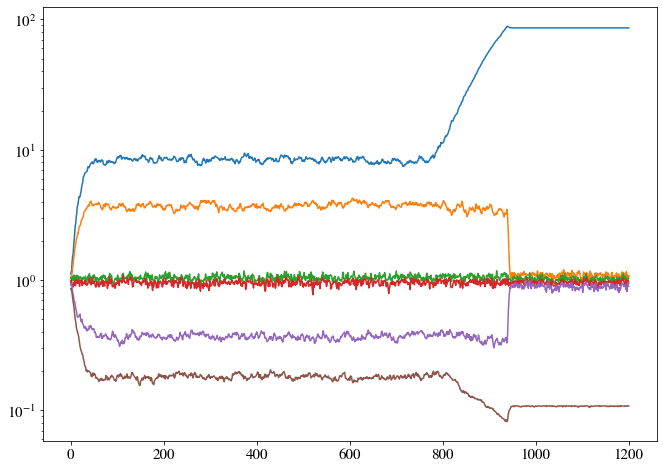

In [1893]:
plt.plot(Eig_1)
plt.plot(Eig_2)
plt.plot(Eig_3)
plt.plot(Eig_4)
plt.plot(Eig_5)
plt.plot(Eig_6)

plt.yscale("log")

# Rotation

In [1894]:
import numpy as np
from scipy.linalg import null_space
import scipy

def gram_schmidt(V):
    
    "Return an unitary matrix with the first column equal to the array V"
    
    ns=null_space(np.conjugate(np.array(V)))
    B=ns.T
    C=np.concatenate((V, B), axis=0)
    
    
    GS=[C[0]/scipy.linalg.norm(C[0])]
    for j in range(1,C.shape[0]):
        sum_vect=C[j]
        for k in range(0,j):
            sum_vect=sum_vect-np.dot(np.conjugate(GS[k]),C[j])*GS[k]
        GS.append(sum_vect/scipy.linalg.norm(sum_vect))
    
    return (np.array(GS)).T




#The first column should be equal up to norm to the array introduced

#(GSc@np.conj(GSc.T)).round(5)   #Test that UU^{\dagger}=1


from numpy import conj as conj
from scipy.linalg import eig

def Rot_new_Unitary(Bloch_vector_like):
    
    Density_matrix            = density_mat(Bloch_vector_like)/N  #Single particle density matrix
    Eigenvalues, Eigenvectors = eig(-Density_matrix)
    Ascending_order           = Eigenvalues.argsort() 
    Eigenvalues               = Eigenvalues[Ascending_order] 
    
    Lambda_vector=Eigenvectors[:,Ascending_order[0]]
    Unitary_den  = gram_schmidt([list(Lambda_vector)])    
    
    
    Transpose_unitary   =Unitary_den.T
    Conjugate_transpose =np.conjugate(Unitary_den.T)

    return np.kron(Transpose_unitary,Conjugate_transpose), Unitary_den

In [1895]:
def Square_mean_ij(Bloch_vector_like):

    Density_matrix=density_mat(Bloch_vector_like)

    Lambda_k=(np.ravel(Density_matrix)).reshape(ind_shap+1,1)

    
    return  Lambda_k@conj(Lambda_k.T)

Cov_series_ij=[]   #Covariance in the base ij

for j in range(len(Result_varTWA_Col_SDE[0])):
    Cov_series_ij.append(   np.array(Result_varTWA_Col_SDE[2][j] - Square_mean_ij(Result_varTWA_Col_SDE[0][j]) )/  (N/2)    )


    
Correl_series_ij=[]  #Correlation in the base ij

for j in range(len(Result_varTWA_Col_SDE[0])):
    Correl_series_ij.append(   np.array(Result_varTWA_Col_SDE[2][j] )/  (N/2)    )

    

In [1896]:
C_tilde_matrices=[]


for j in range(len(Result_varTWA_Col_SDE[0])):

    Bloch_vector_like = Result_varTWA_Col_SDE[0][j]
    Unita_C_Gen       = Rot_new_Unitary(Bloch_vector_like)[0]

    #C_matrix          = Result_varTWA_Col_SDE[2][j] 

    Con_transpose_unit=np.conjugate(Unita_C_Gen.T)


    C_tilde_matrices.append( np.conjugate(Unita_C_Gen)@( Cov_series_ij[j] @  np.conjugate(Con_transpose_unit))  )         #Transforms the covariance matrix
    #C_tilde_matrices.append( Unita_C_Gen@( Correl_series_ij[j] @  Con_transpose_unit)  )     #Transforms the correlation matrix
    


In [1897]:
## Visualize the C_tilde matrix 


#plt.imshow(np.abs(C_tilde_matrices[0]))
#plt.colorbar()
#plt.show()

In [1898]:

# Get the submatrix taking the row(column) 1,2,3,4,8,12

C_submatrix=[]

for j in C_tilde_matrices:
    C_submatrix.append(  j[np.ix_([1,2,3,4,8,12],[1,2,3,4,8,12])]  )

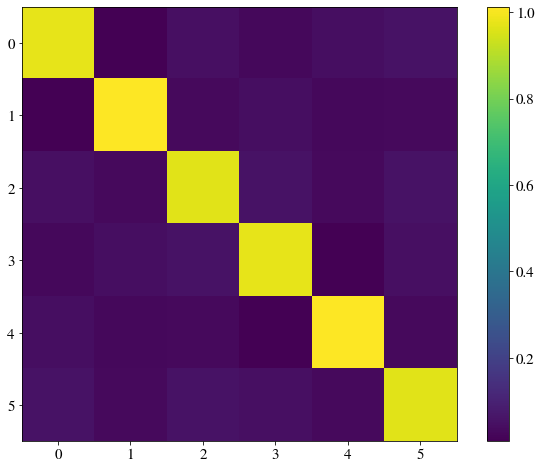

In [1899]:
plt.imshow(np.abs(C_submatrix[0]))
plt.colorbar()
plt.show()

In [1900]:
np.real(eig(C_submatrix[-100])[0])

array([86.14443217,  0.10755633,  0.80447205,  1.02212549,  0.96546822,
        0.9023361 ])

In [1901]:
np.real(eig(Cov_series[-100])[0][:6])

array([86.14443974,  0.80448751,  1.02212594,  0.96547838,  0.90235102,
        0.10756503])

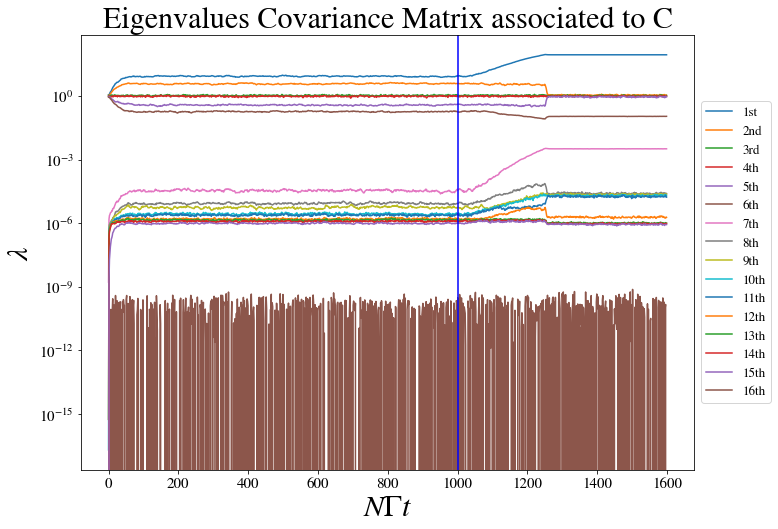

In [1902]:



Eig_1_ij=[]
Eig_2_ij=[]
Eig_3_ij=[]
Eig_4_ij=[]
Eig_5_ij=[]
Eig_6_ij=[]
Eig_7_ij=[]
Eig_8_ij=[]
Eig_9_ij=[]
Eig_10_ij=[]
Eig_11_ij=[]
Eig_12_ij=[]
Eig_13_ij=[]
Eig_14_ij=[]
Eig_15_ij=[]
Eig_16_ij=[]

for j in range(len(Cov_series_ij)):
    Eigenvalues=scipy.linalg.eig( Cov_series_ij[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1_ij.append(Eigenvalues[-1])
    Eig_2_ij.append(Eigenvalues[-2])
    Eig_3_ij.append(Eigenvalues[-3])
    Eig_4_ij.append(Eigenvalues[-4])
    Eig_5_ij.append(Eigenvalues[-5])
    Eig_6_ij.append(Eigenvalues[-6])
    Eig_7_ij.append(Eigenvalues[-7])
    Eig_8_ij.append(Eigenvalues[-8])
    Eig_9_ij.append(Eigenvalues[-9])
    Eig_10_ij.append(Eigenvalues[-10])
    Eig_11_ij.append(Eigenvalues[-11])
    Eig_12_ij.append(Eigenvalues[-12])
    Eig_13_ij.append(Eigenvalues[-13])
    Eig_14_ij.append(Eigenvalues[-14])
    Eig_15_ij.append(Eigenvalues[-15])
    Eig_16_ij.append(Eigenvalues[-16])




fontsize=30


plt.title("Eigenvalues Covariance Matrix associated to C",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

Time_array[:indep]

plt.plot(Time_array[:indep],np.real(Eig_1_ij[:indep]),label="1st")
plt.plot(Time_array[:indep],np.real(Eig_2_ij[:indep]),label="2nd")
plt.plot(Time_array[:indep],np.real(Eig_3_ij[:indep]),label="3rd")
plt.plot(Time_array[:indep],np.real(Eig_4_ij[:indep]),label="4th")
plt.plot(Time_array[:indep],np.real(Eig_5_ij[:indep]),label="5th")
plt.plot(Time_array[:indep],np.real(Eig_6_ij[:indep]),label="6th")
plt.plot(Time_array[:indep],np.real(Eig_7_ij[:indep]),label="7th")
plt.plot(Time_array[:indep],np.real(Eig_8_ij[:indep]),label="8th")
plt.plot(Time_array[:indep],np.real(Eig_9_ij[:indep]),label="9th")
plt.plot(Time_array[:indep],np.real(Eig_10_ij[:indep]),label="10th")
plt.plot(Time_array[:indep],np.real(Eig_11_ij[:indep]),label="11th")
plt.plot(Time_array[:indep],np.real(Eig_12_ij[:indep]),label="12th")
plt.plot(Time_array[:indep],np.real(Eig_13_ij[:indep]),label="13th")
plt.plot(Time_array[:indep],np.real(Eig_14_ij[:indep]),label="14th")
plt.plot(Time_array[:indep],np.real(Eig_15_ij[:indep]),label="15th")
plt.plot(Time_array[:indep],np.real(Eig_16_ij[:indep]),label="16th")

# only one line may be specified; full height
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')
#plt.axvline(x=2*N*GammaR*fraction_time*tng, color='b')

#plt.xscale('log')



plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#plt.savefig("abc.pdf")
#files.download("abc.pdf") 

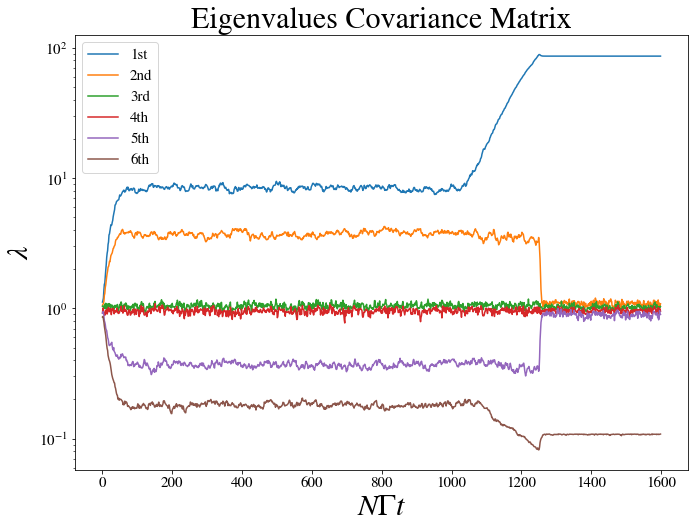

In [1903]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),label="1st")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),label="2nd")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),label="3rd")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),label="4th")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),label="5th")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),label="6th")
#plt.xscale('log')
plt.yscale('log')


plt.legend()


plt.savefig("abc.pdf")

#files.download("abc.pdf") 

In [1904]:

Eig_1_sub=[]
Eig_2_sub=[]
Eig_3_sub=[]
Eig_4_sub=[]
Eig_5_sub=[]
Eig_6_sub=[]


for j in range(len(C_submatrix)):
    Eigenvalues=scipy.linalg.eig( C_submatrix[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1_sub.append(Eigenvalues[-1])
    Eig_2_sub.append(Eigenvalues[-2])
    Eig_3_sub.append(Eigenvalues[-3])
    Eig_4_sub.append(Eigenvalues[-4])
    Eig_5_sub.append(Eigenvalues[-5])
    Eig_6_sub.append(Eigenvalues[-6])

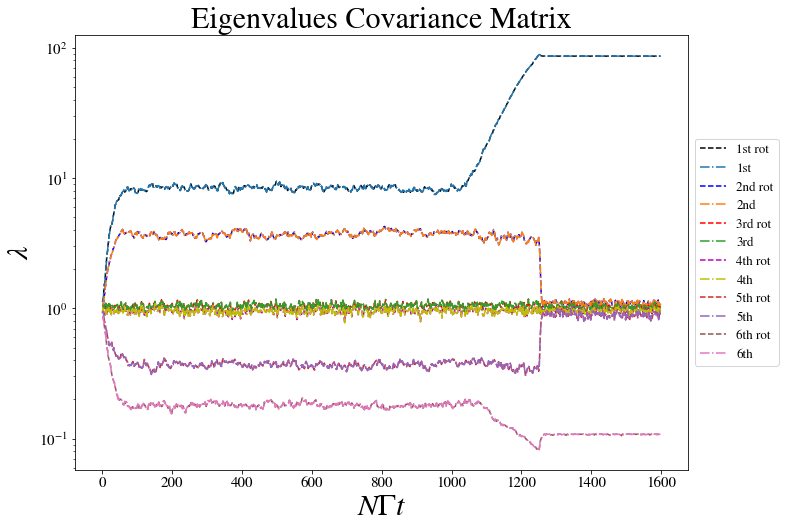

In [1905]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(Time_array[:indep],np.real(Eig_1_sub[:indep]),"--",color='k',label="1st rot")
plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),'-.',label="1st")

plt.plot(Time_array[:indep],np.real(Eig_2_sub[:indep]),"--",color='b',label="2nd rot")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),'-.',label="2nd")


plt.plot(Time_array[:indep],np.real(Eig_3_sub[:indep]),"--",color='r',label="3rd rot")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),'-.',label="3rd")


plt.plot(Time_array[:indep],np.real(Eig_4_sub[:indep]),"--",color='m',label="4th rot")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),'-.',color='y',label="4th")

plt.plot(Time_array[:indep],np.real(Eig_5_sub[:indep]),"--",label="5th rot")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),'-.',label="5th")

plt.plot(Time_array[:indep],np.real(Eig_6_sub[:indep]),"--",label="6th rot")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),'-.',label="6th")



#plt.xscale('log')
plt.yscale('log')


plt.legend()


plt.savefig("abc.pdf")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#files.download("abc.pdf") 

In [1711]:
-10*np.log10(np.min(Eig_6[:indep]))


(7.845917208954908-0j)

In [1554]:
from scipy.linalg import eig
import numpy as np
from scipy.linalg import null_space
import scipy

In [1556]:
def gram_schmidt(V):
    
    "Return an unitary matrix with the first column equal to the array V"
    
    ns=null_space(np.conjugate(np.array(V)))
    B=ns.T
    C=np.concatenate((V, B), axis=0)
    
    
    GS=[C[0]/scipy.linalg.norm(C[0])]
    for j in range(1,C.shape[0]):
        sum_vect=C[j]
        for k in range(0,j):
            sum_vect=sum_vect-np.dot(np.conjugate(GS[k]),C[j])*GS[k]
        GS.append(sum_vect/scipy.linalg.norm(sum_vect))
    
    return (np.array(GS)).T



def Rot_new_Unitary(Bloch_vector_like):
    
    Density_matrix            = density_mat(Bloch_vector_like)/N
    Eigenvalues, Eigenvectors = eig(-Density_matrix)
    Ascending_order           = Eigenvalues.argsort() 
    Eigenvalues               = Eigenvalues[Ascending_order] 

    Unitary_den  = Eigenvectors

    Transpose_unitary   =Unitary_den.T
    Conjugate_transpose =np.conjugate(Unitary_den.T)

    return np.kron(Transpose_unitary,Conjugate_transpose),Unitary_den 


def Square_mean_ij(Bloch_vector_like):

    Density_matrix=density_mat(Bloch_vector_like)

    Lambda_k=(np.ravel(Density_matrix)).reshape(ind_shap+1,1)

    
    return  Lambda_k@conj(Lambda_k.T)

Cov_series_ij=[]

for j in range(len(Result_varTWA_Col_SDE[0])):
    Cov_series_ij.append(   np.array(Result_varTWA_Col_SDE[2][j] - Square_mean_ij(Result_varTWA_Col_SDE[0][j]) )/  (N/2)    )



C_tilde_matrices=[]


for j in range(len(Result_varTWA_Col_SDE[0])):

    Bloch_vector_like = Result_varTWA_Col_SDE[0][j]
    Unita_C_Gen       = Rot_new_Unitary(Bloch_vector_like)[0]

    C_matrix  = Cov_series_ij[j] 

    Con_transpose_unit=np.conjugate(Unita_C_Gen.T)




    C_tilde_matrices.append( np.conj(Unita_C_Gen)@( C_matrix @  np.conj(Con_transpose_unit))  )
    
C_submatrix=[]

for j in C_tilde_matrices:
    C_submatrix.append(  j[np.ix_([1,2,3,4,8,12],[1,2,3,4,8,12])]  )
    
    


In [1559]:
Bloch_vector_like=Result_varTWA_Col_SDE[0][0]

In [1560]:
(Rot_new_Unitary(Bloch_vector_like)[1])[:,0] 

array([ 9.25805775e-01+0.00000000e+00j,  3.73398506e-01+5.87981529e-02j,
       -9.88568126e-06+3.35388291e-06j, -2.10596239e-06-5.61578196e-06j])

In [1561]:
np.cos(Theta/2)

0.9258073177047458

In [1562]:
(np.sin(Theta/2))*np.exp(1j*Phi)

(0.37339374641360273+0.058804086792994j)

In [ ]:
    Density_matrix            = density_mat(Bloch_vector_like)/N
    Eigenvalues, Eigenvectors = eig(-Density_matrix)
    Ascending_order           = Eigenvalues.argsort() 
    Eigenvalues               = Eigenvalues[Ascending_order] 

In [568]:
len(C_tilde_matrices)

5

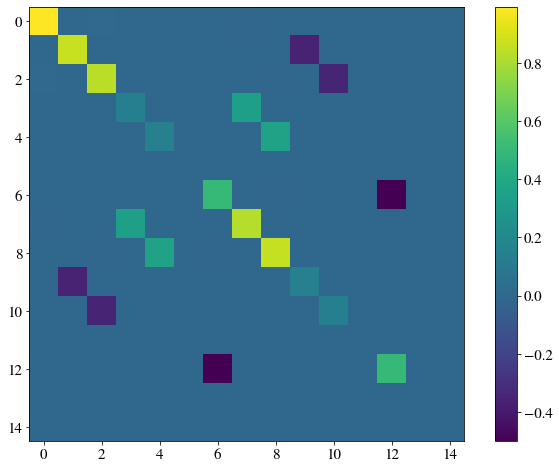

In [570]:
Indexer=-1

#plt.imshow(np.real(C_tilde_matrices[Indexer]))
#plt.imshow(np.real(Cov_series_ij[Indexer]))
plt.imshow(np.real(Cov_series[Indexer]))
plt.colorbar()
plt.show()

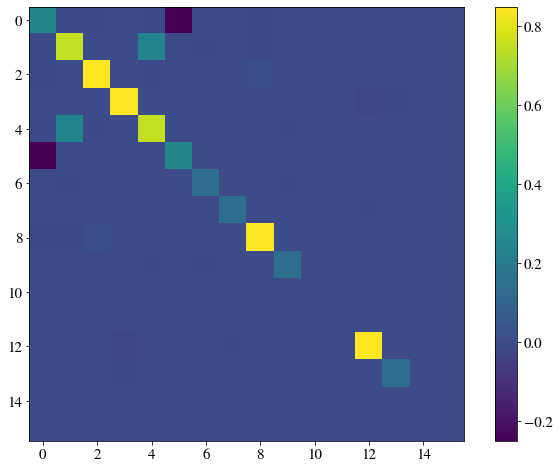

In [571]:
#plt.imshow(np.real(C_tilde_matrices[Indexer]))
plt.imshow(np.real(Cov_series_ij[Indexer]))
plt.colorbar()
plt.show()

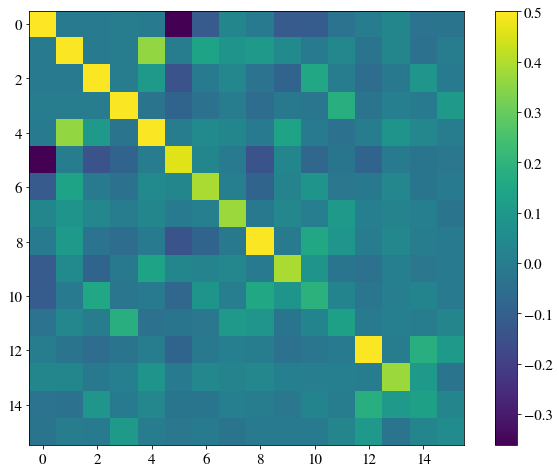

In [572]:
plt.imshow(np.real(C_tilde_matrices[Indexer]))
#plt.imshow(np.real(Cov_series_ij[Indexer]))
plt.colorbar()
plt.show()

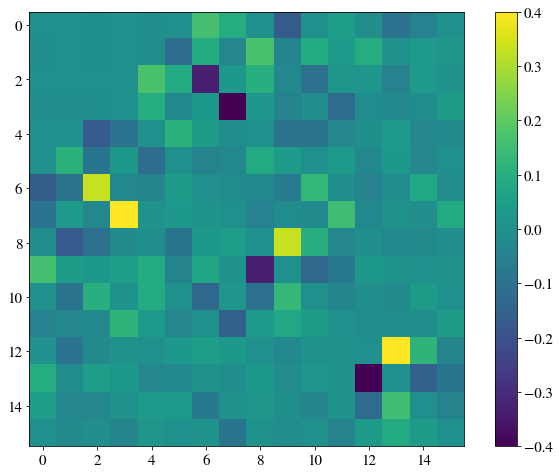

In [573]:
plt.imshow(np.imag(C_tilde_matrices[Indexer]))
#plt.imshow(np.real(Cov_series_ij[Indexer]))
plt.colorbar()
plt.show()

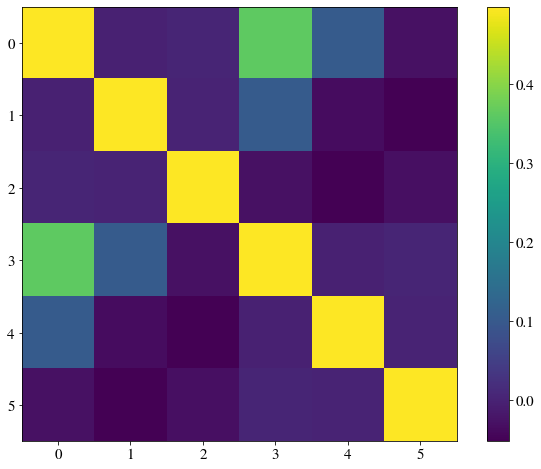

In [574]:

plt.imshow(np.real(C_submatrix[Indexer]))
#plt.imshow(np.imag(C_submatrix[Indexer]))
#plt.imshow(np.real(Cov_series_ij[Indexer]))
plt.colorbar()
plt.show()

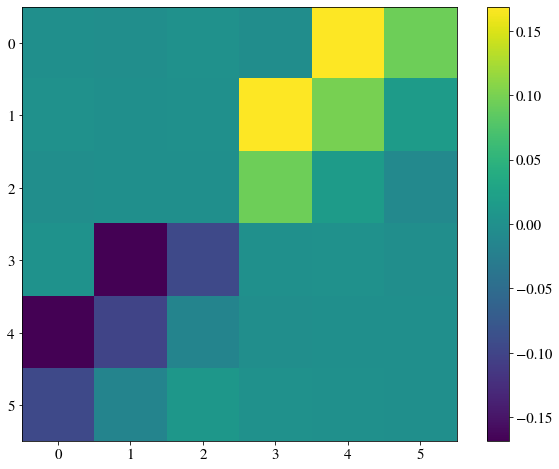

In [575]:

#plt.imshow(np.real(C_submatrix[Indexer]))
plt.imshow(np.imag(C_submatrix[Indexer]))
#plt.imshow(np.real(Cov_series_ij[Indexer]))
plt.colorbar()
plt.show()

In [576]:

eig(C_submatrix[Indexer])[0]

array([-5.98016145e-09+6.51466488e-18j,  9.93994424e-01-1.51685181e-17j,
        4.85760850e-01+3.02207258e-18j,  4.89006642e-01-2.20056254e-17j,
        5.10845275e-01+4.45953054e-18j,  5.05047438e-01+3.70556633e-17j])

In [577]:
eig(Cov_series_ij[Indexer])[0]

array([ 9.64109137e-01-1.12062848e-16j,  1.02508480e+00-1.32185774e-16j,
        9.74865250e-01-4.91607103e-17j,  1.01257574e+00-1.76998459e-17j,
        1.00019281e+00-6.90959221e-17j,  1.00231047e+00-5.55565701e-17j,
       -9.55108802e-09+5.23058992e-17j,  9.47548949e-10+1.22553607e-18j,
       -1.56934473e-10-1.52684254e-17j, -1.05974762e-15+5.60733236e-18j,
       -1.10548694e-15-5.51091086e-18j, -3.82464164e-16-1.12682842e-17j,
       -2.06260841e-16+2.88088592e-18j,  9.45893859e-17-4.74162241e-20j,
        2.29671500e-17+2.00298516e-21j,  1.72093356e-18+4.95943080e-25j])

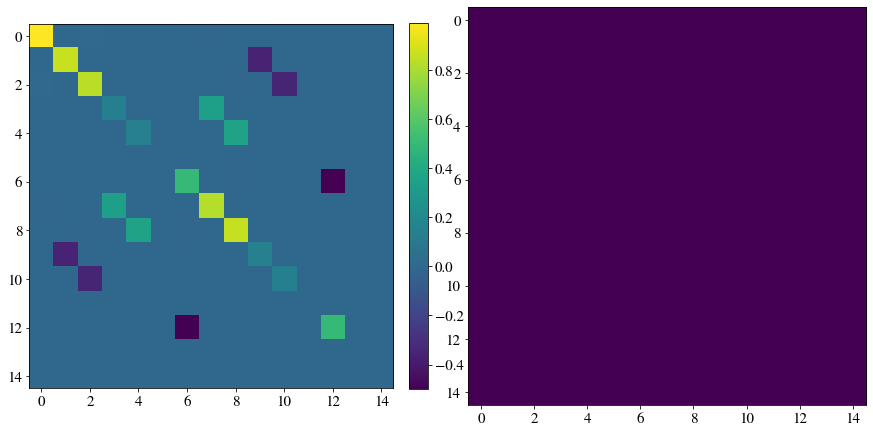

In [578]:
decimals=3
start=2


fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(15,15))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1.4     # the top of the subplots of the figure
wspace = 0.1   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

#plt.imshow(np.real(Cov_series_ij[Indexer]))
#plt.colorbar()
#plt.show()

img=ax1.imshow(np.real(Cov_series[Indexer]),label="Real")
plt.colorbar(img, ax=ax1,fraction=0.046, pad=0.04)


img2=ax2.imshow(np.imag(Cov_series[Indexer]),label="Imag")
#plt.colorbar(img2, ax=ax1,fraction=0.046, pad=0.04)

#ax2.colorbar()

#ax2.legend()

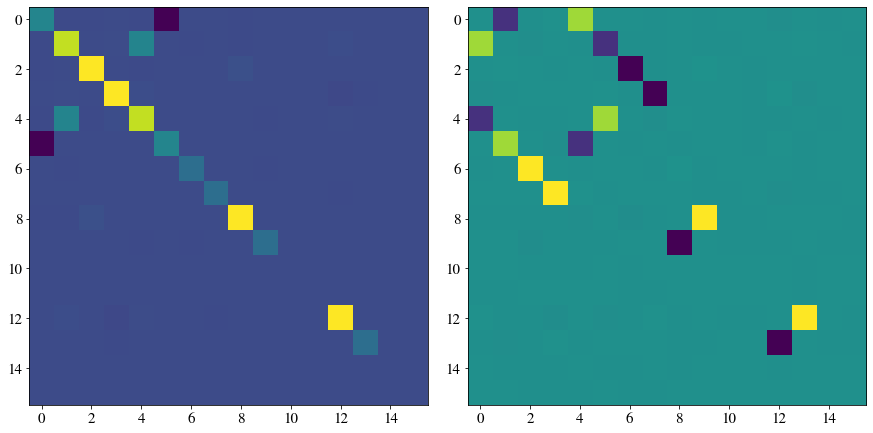

In [579]:
decimals=3
start=2


fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(15,15))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1.4     # the top of the subplots of the figure
wspace = 0.1   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

#plt.imshow(np.real(Cov_series_ij[Indexer]))
#plt.colorbar()
#plt.show()

img=ax1.imshow(np.real(Cov_series_ij[Indexer]),label="Real")
#plt.colorbar(img, ax=ax1,fraction=0.046, pad=0.04)


img2=ax2.imshow(np.imag(Cov_series_ij[Indexer]),label="Imag")
#plt.colorbar(img2, ax=ax1,fraction=0.046, pad=0.04)

#ax2.colorbar()

#ax2.legend()

In [580]:


Eig_1_sub=[]
Eig_2_sub=[]
Eig_3_sub=[]
Eig_4_sub=[]
Eig_5_sub=[]
Eig_6_sub=[]

for j in range(len(Cov_series)):
    Eigenvalues=scipy.linalg.eig( C_submatrix[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1_sub.append(Eigenvalues[-1])
    Eig_2_sub.append(Eigenvalues[-2])
    Eig_3_sub.append(Eigenvalues[-3])
    Eig_4_sub.append(Eigenvalues[-4])
    Eig_5_sub.append(Eigenvalues[-5])
    Eig_6_sub.append(Eigenvalues[-6])

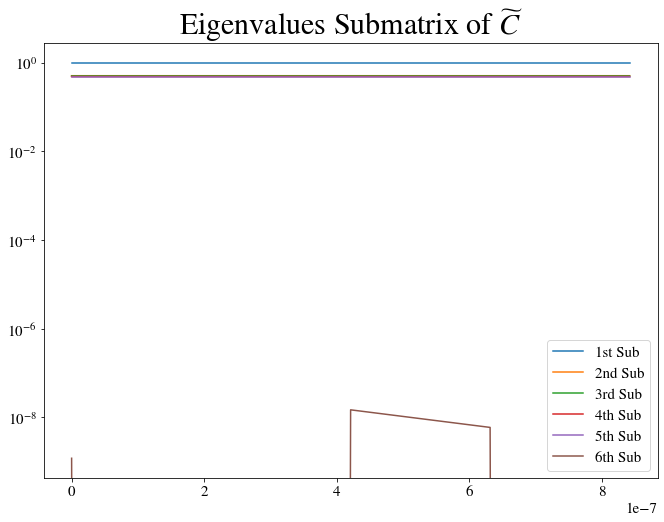

In [581]:

fontsize=30

plt.title("Eigenvalues Submatrix of $\widetilde{C}$",fontsize=fontsize)

plt.plot(Time_array,np.real(Eig_1_sub),label="1st Sub")
plt.plot(Time_array,np.real(Eig_2_sub),label="2nd Sub")
plt.plot(Time_array,np.real(Eig_3_sub),label="3rd Sub")
plt.plot(Time_array,np.real(Eig_4_sub),label="4th Sub")
plt.plot(Time_array,np.real(Eig_5_sub),label="5th Sub")
plt.plot(Time_array,np.real(Eig_6_sub),label="6th Sub")

plt.yscale("log")

plt.legend()

In [504]:

min_value = min(np.real(Eig_6_sub))



min_index = list(np.real(Eig_6_sub)).index(min_value)


print(min_index)

54


In [505]:
density_mat(Result_varTWA_Col_SDE[0][54])

array([[ 3.53909750e+05+0.00000000e+00j,  4.20661577e+05+7.95229707e+00j,
        -1.51829960e+01+1.37737147e+01j, -8.45075261e-01+2.27378367e+05j],
       [ 4.20661577e+05-7.95229707e+00j,  5.00004667e+05+0.00000000e+00j,
        -1.80461002e+01+1.63709509e+01j,  4.19257618e+00+2.70265315e+05j],
       [-1.51829960e+01-1.37737147e+01j, -1.80461002e+01-1.63709509e+01j,
         6.72569770e-03+0.00000000e+00j,  8.84210004e+00-9.74814164e+00j],
       [-8.45075261e-01-2.27378367e+05j,  4.19257618e+00-2.70265315e+05j,
         8.84210004e+00+9.74814164e+00j,  1.46085576e+05+0.00000000e+00j]])

In [507]:
Cov_series[54]

array([[ 4.49617053e-01, -5.61189957e-04, -9.62069876e-03,
        -5.68746015e-04, -3.54125559e-02, -8.11517807e-04,
         3.71946199e-02,  1.26100005e-03,  1.54344552e-01,
         1.53177729e-03,  6.99767946e-01,  2.74840314e-04,
         7.37588136e-01,  1.82880727e-01,  5.17268702e-01],
       [-5.61189957e-04,  3.48813933e-01,  1.27343315e-03,
         4.14566114e-01,  1.64859532e-02,  5.54006783e-03,
        -2.33115196e-02, -8.60259882e-03, -4.15337783e-03,
        -1.02619865e-02, -9.66933546e-04, -2.24081371e-01,
         6.38531279e-03, -9.44578196e-04, -2.72097680e-03],
       [-9.62069876e-03,  1.27343315e-03,  2.54571693e-01,
         1.50071828e-03,  3.92025606e-01, -1.58608736e-03,
        -1.39214019e-01,  2.47467713e-03, -4.35165225e-03,
         2.93017588e-03, -1.50449007e-02, -8.02976899e-04,
        -1.38563680e-02, -4.12804068e-03, -1.16279674e-02],
       [-5.68746015e-04,  4.14566114e-01,  1.50071828e-03,
         4.92716214e-01,  1.95420409e-02,  6.60534766

In [220]:
-10*np.log10(np.min(Eig_6))

(11.81765823542235-0j)

In [221]:
fractionRx

0.97

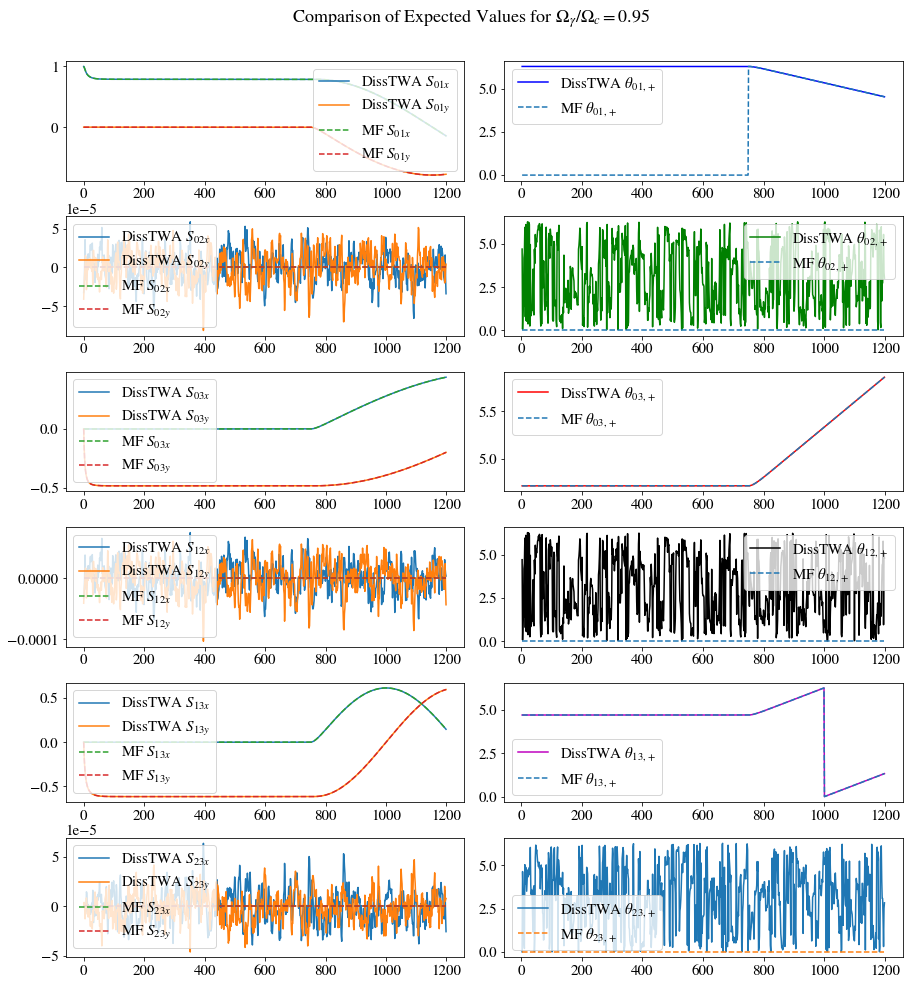

In [222]:
decimals=3
start=2


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12)) = plt.subplots(6, 2,figsize=(15,15))
fig.suptitle('Comparison of Expected Values for $\Omega_{\gamma}/\Omega_c=0.95$')



left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.93      # the top of the subplots of the figure
wspace = 0.1   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)/(N/2)

ax1.plot(Time_array, xeSH,label="DissTWA $ S_{01x}$")
ax1.plot(Time_array, yeSH,label="DissTWA $ S_{01y}$")
ax1.plot(Time_array, mfxeSH,'--',label="MF $ S_{01x}$")
ax1.plot(Time_array, mfyeSH,'--',label="MF $ S_{01y}$")
ax1.legend()


yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
ax2.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'b',label="DissTWA $\\theta_{01,+}$")

yeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)/(N/2)
ax2.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{01,+}$")

ax2.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
ax4.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'g',label="DissTWA $\\theta_{02,+}$")

yeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)/(N/2)
ax4.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{02,+}$")
ax4.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
ax6.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'r',label="DissTWA $ \\theta_{03,+}$")

yeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)/(N/2)
ax6.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{03,+}$")
ax6.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
ax8.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'k',label="DissTWA $\\theta_{12,+}$")

yeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)/(N/2)
ax8.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{12,+}$")
ax8.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
ax10.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'m',label="DissTWA $\\theta_{13,+}$")

yeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)/(N/2)
ax10.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{13,+}$")
ax10.legend()


yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
Theta23=arctan_array(xeSH ,yeSH)[start:]
Res_red=[]

for j in range(len(Theta23)):
    Res_red.append(Theta23[j]%(2*np.pi-0.01))


ax12.plot(Time_array[start:], Res_red,'',label="DissTWA $\\theta_{23,+}$")


yeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)/(N/2)
ax12.plot(Time_array[start:], arctan_array(xeSH ,yeSH)[start:],'--',label="MF $\\theta_{23,+}$")
ax12.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)/(N/2)

ax3.plot(Time_array, xeSH,label="DissTWA $ S_{02x}$")
ax3.plot(Time_array, yeSH,label="DissTWA $ S_{02y}$")
ax3.plot(Time_array, mfxeSH,'--',label="MF $ S_{02x}$")
ax3.plot(Time_array, mfyeSH,'--',label="MF $ S_{02y}$")
ax3.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)/(N/2)

ax5.plot(Time_array, xeSH,label="DissTWA $ S_{03x}$")
ax5.plot(Time_array, yeSH,label="DissTWA $ S_{03y}$")
ax5.plot(Time_array, mfxeSH,'--',label="MF $ S_{03x}$")
ax5.plot(Time_array, mfyeSH,'--',label="MF $ S_{03y}$")
ax5.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)/(N/2)

ax7.plot(Time_array, xeSH,label="DissTWA $ S_{12x}$")
ax7.plot(Time_array, yeSH,label="DissTWA $ S_{12y}$")
ax7.plot(Time_array, mfxeSH,'--',label="MF $ S_{12x}$")
ax7.plot(Time_array, mfyeSH,'--',label="MF $ S_{12y}$")
ax7.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)/(N/2)

ax9.plot(Time_array, xeSH,label="DissTWA $ S_{13x}$")
ax9.plot(Time_array, yeSH,label="DissTWA $ S_{13y}$")
ax9.plot(Time_array, mfxeSH,'--',label="MF $ S_{13x}$")
ax9.plot(Time_array, mfyeSH,'--',label="MF $ S_{13y}$")
ax9.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
mfyeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)/(N/2)

ax11.plot(Time_array, xeSH,label="DissTWA $ S_{23x}$")
ax11.plot(Time_array, yeSH,label="DissTWA $ S_{23y}$")
ax11.plot(Time_array, mfxeSH,'--',label="MF $ S_{23x}$")
ax11.plot(Time_array, mfyeSH,'--',label="MF $ S_{23y}$")
ax11.legend()

#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()


plt.savefig("abc.pdf")
#files.download("abc.pdf")

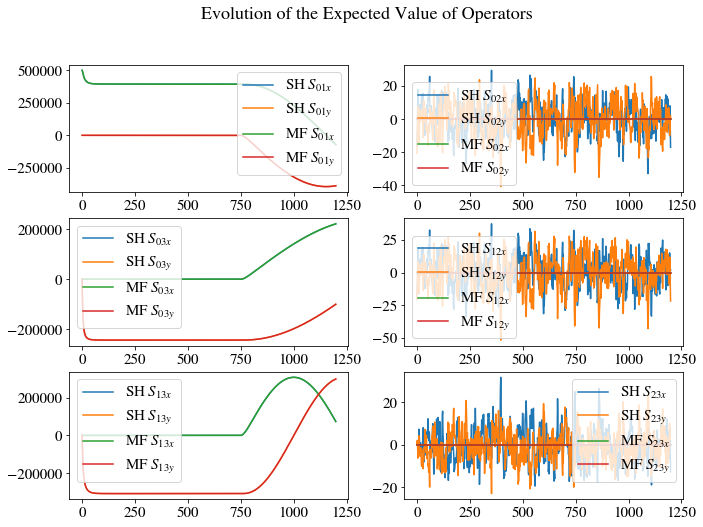

In [223]:
decimals=4


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig.suptitle('Evolution of the Expected Value of Operators')
yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)

mfyeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)

ax1.plot(Time_array, xeSH,label="SH $ S_{01x}$")
ax1.plot(Time_array, yeSH,label="SH $ S_{01y}$")
ax1.plot(Time_array, mfxeSH,label="MF $ S_{01x}$")
ax1.plot(Time_array, mfyeSH,label="MF $ S_{01y}$")
ax1.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)

ax2.plot(Time_array, xeSH,label="SH $ S_{02x}$")
ax2.plot(Time_array, yeSH,label="SH $ S_{02y}$")
ax2.plot(Time_array, mfxeSH,label="MF $ S_{02x}$")
ax2.plot(Time_array, mfyeSH,label="MF $ S_{02y}$")
ax2.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)

ax3.plot(Time_array, xeSH,label="SH $ S_{03x}$")
ax3.plot(Time_array, yeSH,label="SH $ S_{03y}$")
ax3.plot(Time_array, mfxeSH,label="MF $ S_{03x}$")
ax3.plot(Time_array, mfyeSH,label="MF $ S_{03y}$")
ax3.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)

ax4.plot(Time_array, xeSH,label="SH $ S_{12x}$")
ax4.plot(Time_array, yeSH,label="SH $ S_{12y}$")
ax4.plot(Time_array, mfxeSH,label="MF $ S_{12x}$")
ax4.plot(Time_array, mfyeSH,label="MF $ S_{12y}$")
ax4.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)

ax5.plot(Time_array, xeSH,label="SH $ S_{13x}$")
ax5.plot(Time_array, yeSH,label="SH $ S_{13y}$")
ax5.plot(Time_array, mfxeSH,label="MF $ S_{13x}$")
ax5.plot(Time_array, mfyeSH,label="MF $ S_{13y}$")
ax5.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)
mfyeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)
mfxeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)

ax6.plot(Time_array, xeSH,label="SH $ S_{23x}$")
ax6.plot(Time_array, yeSH,label="SH $ S_{23y}$")
ax6.plot(Time_array, mfxeSH,label="MF $ S_{23x}$")
ax6.plot(Time_array, mfyeSH,label="MF $ S_{23y}$")
ax6.legend()

#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()

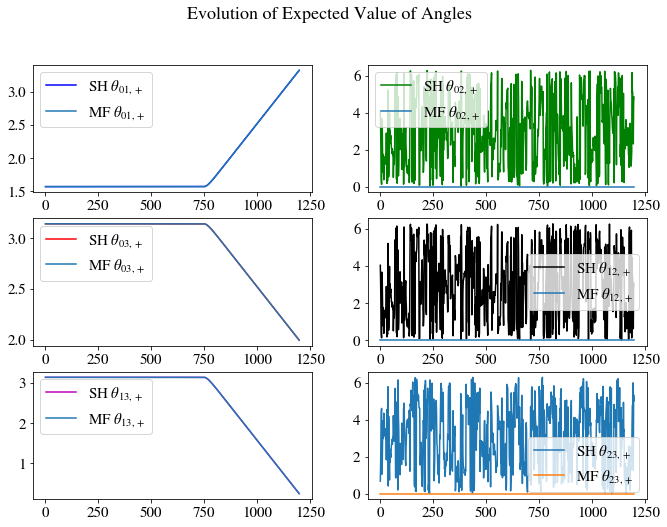

In [224]:
decimals=3
start=1

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig.suptitle('Evolution of Expected Value of Angles')


yeSH=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)
ax1.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],'b',label="SH $\\theta_{01,+}$")

yeSH=np.around(MF_res[:,6]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,0]/sqrt(2),decimals=decimals)
ax1.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{01,+}$")

ax1.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)
ax2.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],'g',label="SH $\\theta_{02,+}$")

yeSH=np.around(MF_res[:,7]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,1]/sqrt(2),decimals=decimals)
ax2.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{02,+}$")
ax2.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)
ax3.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],'r',label="SH $ \\theta_{03,+}$")

yeSH=np.around(MF_res[:,8]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,2]/sqrt(2),decimals=decimals)
ax3.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{03,+}$")
ax3.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)
ax4.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],'k',label="SH $\\theta_{12,+}$")

yeSH=np.around(MF_res[:,9]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,3]/sqrt(2),decimals=decimals)
ax4.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{12,+}$")
ax4.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)
ax5.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],'m',label="SH $\\theta_{13,+}$")

yeSH=np.around(MF_res[:,10]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,4]/sqrt(2),decimals=decimals)
ax5.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{13,+}$")
ax5.legend()

yeSH=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)
ax6.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],'',label="SH $\\theta_{23,+}$")


yeSH=np.around(MF_res[:,11]/sqrt(2),decimals=decimals)
xeSH=np.around(MF_res[:,5]/sqrt(2),decimals=decimals)
ax6.plot(Time_array[start:], arctan_array(yeSH ,xeSH)[start:],label="MF $\\theta_{23,+}$")
ax6.legend()


#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()

In [225]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

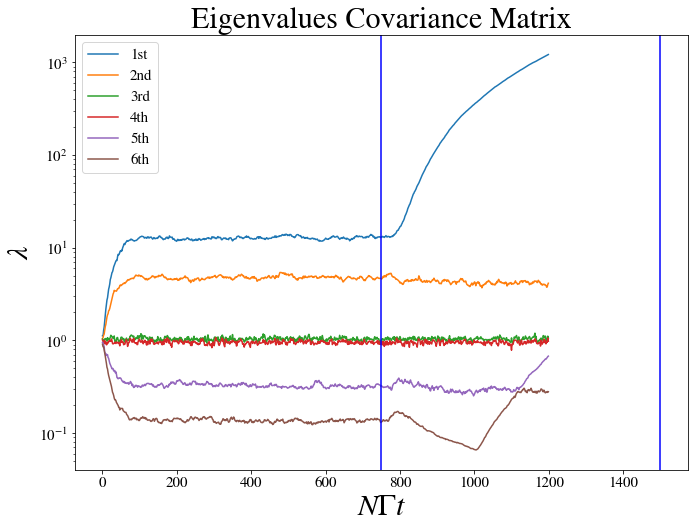

In [226]:

fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),label="1st")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),label="2nd")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),label="3rd")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),label="4th")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),label="5th")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),label="6th")

# only one line may be specified; full height
#plt.axvline(x=1400, color='b')
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')
#plt.axvline(x=2*N*GammaR*fraction_time*tng, color='b')


plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')


#plt.xscale('log')
plt.yscale('log')
plt.legend()

#plt.savefig("abcRL.pdf")
#files.download("abcRL.pdf") 

In [227]:
np.min(Eig_6[:indep])

(0.06580125494645364+0j)

In [228]:
-10*np.log10( np.min(Eig_6[:indep]) )

(11.81765823542235-0j)

In [229]:
fractionRx

0.97

In [230]:
Coherences_array_SDE=(Result_varTWA_Col_SDE[0][:,0]/sqrt(2))**2

for j in range(1,12):
    if j!=2 and j!=3 and j!=8 and j!=9:
        Coherences_array_SDE=Coherences_array_SDE+(Result_varTWA_Col_SDE[0][:,j]/sqrt(2))**2



Define the coherence function as $C_{f}=\left(\sum \left(\left< C_x \right>^2+\left< C_y \right>^2 \right)\right)^{1/2}  $

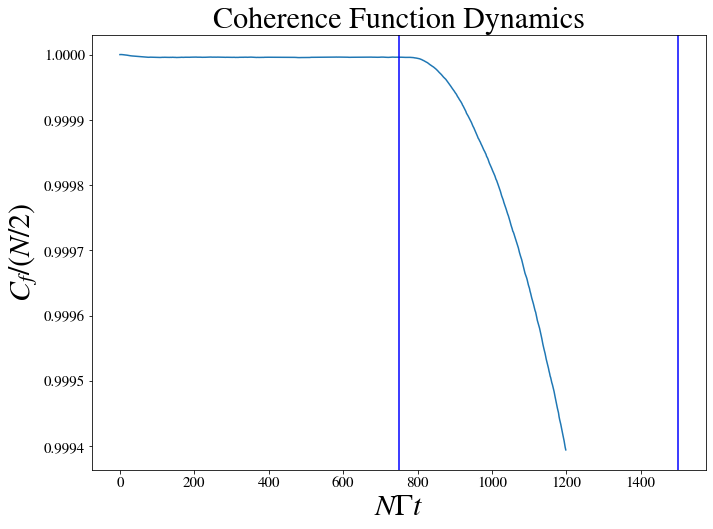

In [231]:

fontsize=30

plt.title("Coherence Function Dynamics",fontsize=fontsize)

plt.plot(Time_array,Coherences_array_SDE**0.5/(N/2),label="Coherences")
plt.ylabel('$C_f/(N/2)$',fontsize=fontsize)
plt.xlabel('$N\Gamma t$',fontsize=fontsize)
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')

plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')


#plt.yscale("log")

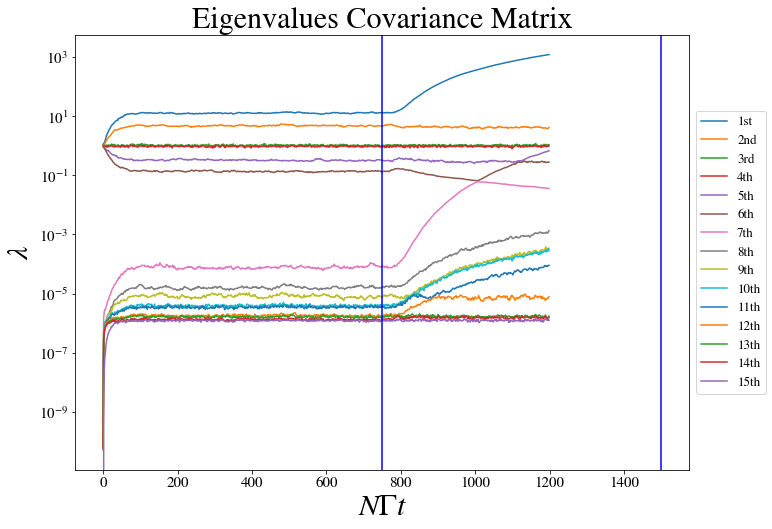

In [240]:



Eig_1=[]
Eig_2=[]
Eig_3=[]
Eig_4=[]
Eig_5=[]
Eig_6=[]
Eig_7=[]
Eig_8=[]
Eig_9=[]
Eig_10=[]
Eig_11=[]
Eig_12=[]
Eig_13=[]
Eig_14=[]
Eig_15=[]

for j in range(len(Cov_series)):
    Eigenvalues=scipy.linalg.eig( Cov_series[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1.append(Eigenvalues[-1])
    Eig_2.append(Eigenvalues[-2])
    Eig_3.append(Eigenvalues[-3])
    Eig_4.append(Eigenvalues[-4])
    Eig_5.append(Eigenvalues[-5])
    Eig_6.append(Eigenvalues[-6])
    Eig_7.append(Eigenvalues[-7])
    Eig_8.append(Eigenvalues[-8])
    Eig_9.append(Eigenvalues[-9])
    Eig_10.append(Eigenvalues[-10])
    Eig_11.append(Eigenvalues[-11])
    Eig_12.append(Eigenvalues[-12])
    Eig_13.append(Eigenvalues[-13])
    Eig_14.append(Eigenvalues[-14])
    Eig_15.append(Eigenvalues[-15])




fontsize=30


plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

Time_array[:indep]

plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),label="1st")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),label="2nd")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),label="3rd")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),label="4th")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),label="5th")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),label="6th")
plt.plot(Time_array[:indep],np.real(Eig_7[:indep]),label="7th")
plt.plot(Time_array[:indep],np.real(Eig_8[:indep]),label="8th")
plt.plot(Time_array[:indep],np.real(Eig_9[:indep]),label="9th")
plt.plot(Time_array[:indep],np.real(Eig_10[:indep]),label="10th")
plt.plot(Time_array[:indep],np.real(Eig_11[:indep]),label="11th")
plt.plot(Time_array[:indep],np.real(Eig_12[:indep]),label="12th")
plt.plot(Time_array[:indep],np.real(Eig_13[:indep]),label="13th")
plt.plot(Time_array[:indep],np.real(Eig_14[:indep]),label="14th")
plt.plot(Time_array[:indep],np.real(Eig_15[:indep]),label="15th")

# only one line may be specified; full height
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')
#plt.axvline(x=2*N*GammaR*fraction_time*tng, color='b')

#plt.xscale('log')



plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#plt.savefig("abc.pdf")
#files.download("abc.pdf") 

In [241]:
-10*np.log10(np.min(Eig_6))

(11.81765823542235-0j)

In [242]:
Eig_1

[(1.1209029663008028+0j),
 (1.112859896212062+0j),
 (1.2768016444908676+0j),
 (1.393451141043948+0j),
 (1.6271538141548898+0j),
 (1.9198219096377138+0j),
 (2.1686813650015626+0j),
 (2.4577185861859157+0j),
 (2.721772511068218+0j),
 (2.87699905970113+0j),
 (3.2106255480623047+0j),
 (3.5633511809473295+0j),
 (3.764264279037449+0j),
 (4.061614141542398+0j),
 (4.533373265247775+0j),
 (4.744477286133376+0j),
 (5.08258383790306+0j),
 (5.3791129756319584+0j),
 (5.500978150748667+0j),
 (5.799822037912545+0j),
 (6.192091681368931+0j),
 (6.4374056924886+0j),
 (6.67371958872903+0j),
 (6.948857566441115+0j),
 (7.1796938337745635+0j),
 (7.3014552228889915+0j),
 (7.274249066277923+0j),
 (7.994468291683176+0j),
 (8.480203157788086+0j),
 (8.386602230932725+0j),
 (8.52194229894337+0j),
 (8.924428586394438+0j),
 (9.23925687881738+0j),
 (9.097570675183167+0j),
 (9.371619913618105+0j),
 (9.256181732121934+0j),
 (9.92480079299303+0j),
 (10.316796907612297+0j),
 (10.756055632522695+0j),
 (11.075731659949657

C:\Users\camil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


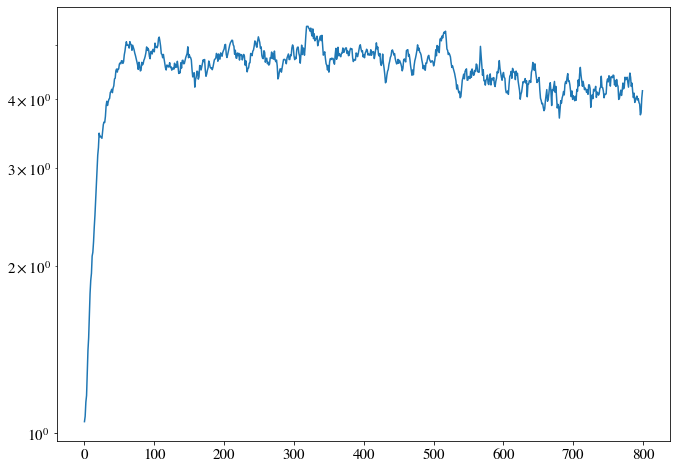

In [235]:
plt.plot(Eig_2)

plt.yscale("log")

In [236]:
Eig_1[-1]

(1215.695291591489+0j)

In [ ]:
"""

Matrix_Basis=[f10x,f20x,f30x,f21x,f31x,f32x,f10y,f20y,f30y,f21y,f31y,f32y,f0z,f1z,f2z]


def density_mat(Array):
    
    Array=Array[0:15]
    
    Result=(N-Array[-1]-Array[-2]-Array[-3])*f3z
    for j in range(15):
        Result=Result + Array[j]*Matrix_Basis[j]

    return Result
"""
k=0

Result_varTWA_Col_SDE[0][k:k+1,]



plt.title("Purity Dynamics",fontsize=fontsize)
plt.xlabel('$N\Gamma t$',fontsize=fontsize)
plt.ylabel('Tr$( \\rho^2)$',fontsize=fontsize)



Purity=[]


for j in range(Result_varTWA_Col_SDE[0].shape[0]):

    mat_j=density_mat(Result_varTWA_Col_SDE[0][j:j+1,][0])/(N)

    Purity.append(np.trace(mat_j@mat_j)  )



plt.plot(Time_array,Purity)

plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')


In [ ]:

Lenght_BB=[]

for j in range(Result_varTWA_Col_SDE[0].shape[0]):
    Lenght_BB.append(scipy.linalg.norm( Result_varTWA_Col_SDE[0][j:j+1,][0] )/N)

plt.title("Normalized Lenght Bloch Vector",fontsize=fontsize)
plt.xlabel('$N\Gamma t$',fontsize=fontsize)
plt.ylabel('$ \Vert \overrightarrow{b}\Vert/N   $',fontsize=fontsize)


plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.plot(Time_array,Lenght_BB)    

In [ ]:
###2, 4, 8, 10, 12, 15

In [ ]:
xeSH=np.around(Result_varTWA_Col_SDE[0][:,18],decimals=decimals)

#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')

plt.plot(Time_array, xeSH)

In [ ]:
decimals=3


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Evolution of Expected Value of Bosonic Operators')

yeSH0=np.around(Result_varTWA_Col_SDE[0][:,15],decimals=decimals)
mfyeSH0=np.around(MF_res[:,15],decimals=decimals)
ax1.plot(Time_array, yeSH0,label="DissTWA $a_{Rx}$")
ax1.plot(Time_array, mfyeSH0,"--",label="MF $a_{Rx}$")
ax1.legend()

yeSH1=np.around(Result_varTWA_Col_SDE[0][:,16],decimals=decimals)
mfyeSH1=np.around(MF_res[:,16],decimals=decimals)
ax2.plot(Time_array, yeSH1,label="DissTWA $a_{Ry}$")
ax2.plot(Time_array, mfyeSH1,label="MF $a_{Ry}$")
ax2.legend()

yeSH2=np.around(Result_varTWA_Col_SDE[0][:,17],decimals=decimals)
mfyeSH2=np.around(MF_res[:,17],decimals=decimals)
ax3.plot(Time_array, yeSH2,label="DissTWA $a_{Lx}$")
ax3.plot(Time_array, mfyeSH2,label="DissTWA $a_{Lx}$")
ax3.legend()


yeSH3=np.around(Result_varTWA_Col_SDE[0][:,18],decimals=decimals)
mfyeSH3=np.around(MF_res[:,18],decimals=decimals)
ax4.plot(Time_array, yeSH3,label="DissTWA $a_{Ly}$")
ax4.plot(Time_array, mfyeSH3,label="DissTWA $a_{Ly}$")
ax4.legend()


#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')

#for ax in fig.get_axes():
#    ax.label_outer()


In [ ]:
plt.title("Dynamics Bosonic Operators and BCL",fontsize=fontsize)


yeSH=np.around(Result_varTWA_Col_SDE[0][:,8],decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,2],decimals=decimals)

a_Rx=gR*(KapR*yeSH/2+DeltaR*xeSH)/(np.sqrt(2)*(  (KapR/2)**2+DeltaR**2 )  )
a_Ry=gR*(-KapR*xeSH/2+DeltaR*yeSH)/(np.sqrt(2)*(  (KapR/2)**2+DeltaR**2 )  )

yeSH0=np.around(Result_varTWA_Col_SDE[0][:,15],decimals=decimals)
xeSH0=np.around(Result_varTWA_Col_SDE[0][:,16],decimals=decimals)

plt.plot(Time_array,a_Rx,label="DissTWA $a_x$")
plt.plot(Time_array,yeSH0,"--",label="BCL $a_x$")

plt.plot(Time_array,a_Ry,label="DissTWA $a_y$")
plt.plot(Time_array,xeSH0,"--",label="BCL $a_y$")

plt.xlabel("$N\Gamma t$")
plt.ylabel('$<a_{\gamma}>$')



plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.legend()

In [ ]:
plt.title("Dynamics Bosonic Operators and BCL",fontsize=fontsize)


yeSH=np.around(Result_varTWA_Col_SDE[0][:,9],decimals=decimals)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,3],decimals=decimals)

a_Rx=gL*(KapL*yeSH/2+DeltaL*xeSH)/(np.sqrt(2)*(  (KapL/2)**2+DeltaL**2 )  )
a_Ry=gL*(-KapL*xeSH/2+DeltaL*yeSH)/(np.sqrt(2)*(  (KapL/2)**2+DeltaL**2 )  )

yeSH0=np.around(Result_varTWA_Col_SDE[0][:,17],decimals=decimals)
xeSH0=np.around(Result_varTWA_Col_SDE[0][:,18],decimals=decimals)

plt.plot(Time_array,a_Rx,label="DissTWA $a_{Lx}$")
plt.plot(Time_array,yeSH0,"--",label="BCL $a_{Lx}$")

plt.plot(Time_array,a_Ry,label="DissTWA $a_{Ly}$")
plt.plot(Time_array,xeSH0,"--",label="BCL $a_{Ly}$")

plt.xlabel("$N\Gamma t$")
plt.ylabel('$<a_{\gamma}>$')



plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.legend()

In [ ]:

Res=0


yeSH=np.around(Result_varTWA_Col_SDE[0][:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,Res]/sqrt(2),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ S_{01x}$")
plt.plot(Time_array, yeSH,label="DissTWA $ S_{01y}$")
plt.plot(Time_array, mfxeSH,'--',label="MF $ S_{01x}$")
plt.plot(Time_array, mfyeSH,'--',label="MF $ S_{01y}$")


plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')




plt.legend()

In [ ]:
Res=0


yeSH=np.around(Result_varTWA_Col_SDE[0][:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,Res]/sqrt(2),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ S_{01x}$")
plt.plot(Time_array, yeSH,label="DissTWA $ S_{01y}$")
plt.plot(Time_array, mfxeSH,'--',label="MF $ S_{01x}$")
plt.plot(Time_array, mfyeSH,'--',label="MF $ S_{01y}$")



plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.legend()

In [ ]:
Res=1


yeSH=np.around(Result_varTWA_Col_SDE[0][:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,Res]/sqrt(2),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ S_{02x}$")
plt.plot(Time_array, yeSH,label="DissTWA $ S_{02y}$")
plt.plot(Time_array, mfxeSH,'--',label="MF $ S_{02x}$")
plt.plot(Time_array, mfyeSH,'--',label="MF $ S_{02y}$")



plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')




plt.legend()

In [ ]:
Res=2


yeSH=np.around(Result_varTWA_Col_SDE[0][:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,Res]/sqrt(2),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ S_{03x}$")
plt.plot(Time_array, yeSH,label="DissTWA $ S_{03y}$")
plt.plot(Time_array, mfxeSH,'--',label="MF $ S_{03x}$")
plt.plot(Time_array, mfyeSH,'--',label="MF $ S_{03y}$")


plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')




plt.legend()

In [ ]:
Res=3


yeSH=np.around(Result_varTWA_Col_SDE[0][:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,Res]/sqrt(2),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ S_{12x}$")
plt.plot(Time_array, yeSH,label="DissTWA $ S_{12y}$")
plt.plot(Time_array, mfxeSH,'--',label="MF $ S_{12x}$")
plt.plot(Time_array, mfyeSH,'--',label="MF $ S_{12y}$")



plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')




plt.legend()

In [ ]:
Res=4


yeSH=np.around(Result_varTWA_Col_SDE[0][:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,Res]/sqrt(2),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ S_{13x}$")
plt.plot(Time_array, yeSH,label="DissTWA $ S_{13y}$")
plt.plot(Time_array, mfxeSH,'--',label="MF $ S_{13x}$")
plt.plot(Time_array, mfyeSH,'--',label="MF $ S_{13y}$")



plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.legend()

In [ ]:
Res=6


yeSH=np.around(Result_varTWA_Col_SDE[0][:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(2),decimals=decimals)/(N/2)

mfyeSH=np.around(MF_res[:,Res+6]/sqrt(2),decimals=decimals)/(N/2)
mfxeSH=np.around(MF_res[:,Res]/sqrt(2),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ S_{23x}$")
plt.plot(Time_array, yeSH,label="DissTWA $ S_{23y}$")
plt.plot(Time_array, mfxeSH,'--',label="MF $ S_{23x}$")
plt.plot(Time_array, mfyeSH,'--',label="MF $ S_{23y}$")


plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')




plt.legend()

In [ ]:
Res=12


xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(1),decimals=decimals)/(N/2)


mfxeSH=np.around(MF_res[:,Res]/sqrt(1),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ n_{0}$")

plt.plot(Time_array, mfxeSH,'--',label="MF $ n_{0}$")


plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')




plt.legend()

In [ ]:
Res=13


xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(1),decimals=decimals)/(N/2)


mfxeSH=np.around(MF_res[:,Res]/sqrt(1),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ n_{1}$")

plt.plot(Time_array, mfxeSH,'--',label="MF $ n_{1} $")



plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.legend()

In [ ]:
Res=14


xeSH=np.around(Result_varTWA_Col_SDE[0][:,Res]/sqrt(1),decimals=decimals)/(N/2)


mfxeSH=np.around(MF_res[:,Res]/sqrt(1),decimals=decimals)/(N/2)

plt.plot(Time_array, xeSH,label="DissTWA $ n_{2}$")

plt.plot(Time_array, mfxeSH,'--',label="MF $ n_{2} $")


plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.legend()

In [ ]:
Ar6=Eig_6[:indep]

( (4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))]-tng*4*Omega_cR )/(4*Omega_cR)

In [ ]:
N

In [ ]:
(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))]

In [ ]:
print(fractionRx,( (4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))]-tng*4*Omega_cR )/(4*Omega_cR))

In [ ]:
Ar6.index(min(Ar6))

In [ ]:
from scipy import linalg


j_initio=150


Aper=np.linspace(0,14,15)
Japer=Aper.astype(int)

Eigenval_listed=[]
Eigenvec_listed=[]
Permutations_ar=[]



eigenValues_0  , eigenVectors_0   = linalg.eig(Cov_series[j_initio])

idx_0 = eigenValues_0.argsort()[::-1]   
eigenValues_0  = eigenValues_0[idx_0]
eigenVectors_0 = eigenVectors_0[:,idx_0]

Eigenval_listed.append(eigenValues_0)
Permutations_ar.append(Japer)
Eigenvec_listed.append(eigenVectors_0)


for j in range(j_initio,len(Time_array)-1):
        
    eigenValues_jp1  , eigenVectors_jp1   = linalg.eig(Cov_series[j+1])
    idx_jp1          = eigenValues_jp1.argsort()[::-1]   
    eigenValues_jp1  = eigenValues_jp1[idx_jp1]
    eigenVectors_jp1 = eigenVectors_jp1[:,idx_jp1]

    if j == j_initio:
        Mat_coord=np.abs(np.transpose(eigenVectors_jp1)@eigenVectors_0)
        Permutations_ar.append(   np.argmax(Mat_coord, axis=1)  )
        Eigenval_listed.append(eigenValues_jp1)
        Eigenvec_listed.append(eigenVectors_jp1)

    else:

        eigenValues_j  , eigenVectors_j   = linalg.eig(Cov_series[j])
        idx_j                             = eigenValues_j.argsort()[::-1]   
        eigenValues_j                     = eigenValues_j[idx_j]
        eigenVectors_j                    = eigenVectors_j[:,idx_j]

        Mat_coord=np.abs(np.transpose(eigenVectors_jp1)@eigenVectors_j)
        Permutations_ar.append(   np.argmax(Mat_coord, axis=1)  )
        Eigenval_listed.append(eigenValues_jp1)
        Eigenvec_listed.append(eigenVectors_jp1)


Result_permutation=[Permutations_ar[0]]


for j in range(len(Permutations_ar)-1):

    Per_jp1 = Permutations_ar[j+1]

    Result_permutation.append( Per_jp1[Result_permutation[j]]  )


Arranged_eigenvalues =[]
Arranged_eigenvectors=[]

for j in range(len(Result_permutation)):

    Arranged_eigenvalues.append( Eigenval_listed[j][Result_permutation[j]]   )
    Arranged_eigenvectors.append( Eigenvec_listed[j][Result_permutation[j]]   )


In [ ]:
Eigenvalues_ordered=np.real(np.array(Arranged_eigenvalues))
plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)
plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,0],label="Original 1st")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,1],label="Original 2nd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,2],label="Original 3rd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,3],label="Original 4th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,4],label="Original 5th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,5],label="Original 6th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,6],label="Original 7th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,7],label="Original 8th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,8],label="Original 9th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,9],label="Original 10th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,10],label="Original 11th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,11],label="Original 12th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,12],label="Original 13th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,13],label="Original 14th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,14],label="Original 15th")




plt.yscale("log")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=8)

plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")




In [ ]:
plt.plot(Eigenvalues_ordered[:,1][j_initio:],label="Original 2nd")
plt.plot(Eigenvalues_ordered[:,2][j_initio:],label="Original 3rd")
plt.plot(Eigenvalues_ordered[:,3][j_initio:],label="Original 4th")
plt.plot(Eigenvalues_ordered[:,4][j_initio:],label="Original 5th")


plt.legend()

In [ ]:
def partit(number,array):
    j=0
    dis=len(array)
    result=[]
    while j*number<dis:
        result.append(array[j*number])
        j=j+1
    return result


In [ ]:
Arr_EigenVect=Arranged_eigenvectors


Eigenv_index=0


def Matrix_evol_eigVect(Eigenv_index,Compon):

    Vect_in0=Arr_EigenVect[0][:,Eigenv_index].reshape(15,1)
    

    Initio=np.sign(Vect_in0[Compon,0] )*Vect_in0
    for j in range(1,len(Arr_EigenVect)):

        Vect_ref=(Arr_EigenVect[j][:,Eigenv_index].reshape(15,1))
        

        sign_vec=np.sign( Vect_ref[Compon,0])  #Needed sign because the vector components oscillated, this is due to the fact that if v is eigenvector of A
                                                     # then -v is an eigenvector as well with the same eigenvalue

        Initio=np.concatenate((Initio, sign_vec*Vect_ref  ),1)

    return Initio

In [ ]:
from scipy import linalg


j_initio=150


Aper=np.linspace(0,14,15)
Japer=Aper.astype(int)

Eigenval_listed=[]
Eigenvec_listed=[]
Permutations_ar=[]



eigenValues_0  , eigenVectors_0   = linalg.eig(Cov_series[j_initio])

idx_0 = eigenValues_0.argsort()[::-1]   
eigenValues_0  = eigenValues_0[idx_0]
eigenVectors_0 = eigenVectors_0[:,idx_0]

Eigenval_listed.append(eigenValues_0)
Permutations_ar.append(Japer)
Eigenvec_listed.append(eigenVectors_0)


for j in range(j_initio,len(Time_array)-1):
        
    eigenValues_jp1  , eigenVectors_jp1   = linalg.eig(Cov_series[j+1])
    idx_jp1          = eigenValues_jp1.argsort()[::-1]   
    eigenValues_jp1  = eigenValues_jp1[idx_jp1]
    eigenVectors_jp1 = eigenVectors_jp1[:,idx_jp1]

    if j == j_initio:
        Mat_coord=np.abs(np.transpose(eigenVectors_jp1)@eigenVectors_0)
        Permutations_ar.append(   np.argmax(Mat_coord, axis=1)  )
        Eigenval_listed.append(eigenValues_jp1)
        Eigenvec_listed.append(eigenVectors_jp1)

    else:

        eigenValues_j  , eigenVectors_j   = linalg.eig(Cov_series[j])
        idx_j                             = eigenValues_j.argsort()[::-1]   
        eigenValues_j                     = eigenValues_j[idx_j]
        eigenVectors_j                    = eigenVectors_j[:,idx_j]

        Mat_coord=np.abs(np.transpose(eigenVectors_jp1)@eigenVectors_j)
        Permutations_ar.append(   np.argmax(Mat_coord, axis=1)  )
        Eigenval_listed.append(eigenValues_jp1)
        Eigenvec_listed.append(eigenVectors_jp1)


Result_permutation=[Permutations_ar[0]]


for j in range(len(Permutations_ar)-1):

    Per_jp1 = Permutations_ar[j+1]

    Result_permutation.append( Result_permutation[j][Per_jp1] )


Arranged_eigenvalues =[]
Arranged_eigenvectors=[]

for j in range(len(Result_permutation)):

    Arranged_eigenvalues.append( Eigenval_listed[j][Result_permutation[j]]   )
    Arranged_eigenvectors.append( Eigenvec_listed[j][Result_permutation[j]]   )


In [ ]:
eigenValues_0  , eigenVectors_0   = linalg.eig(Cov_series[j_initio])

idx_0 = eigenValues_0.argsort()[::-1]   
eigenValues_0  = eigenValues_0[idx_0]
eigenVectors_0 = eigenVectors_0[:,idx_0]

In [ ]:
eigenValues_0

In [ ]:
idx_0

In [ ]:
eigenVectors_0 

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(eigenVectors_0 )
plt.colorbar()
plt.show()

In [ ]:
eigenVectors_0 

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(eigenVectors_0 )
plt.colorbar()
plt.show()

In [ ]:
eigenValues_0  , eigenVectors_0   = linalg.eig(Cov_series[j_initio])

idx_0 = eigenValues_0.argsort()[::-1]   
eigenValues_0  = eigenValues_0[idx_0]
eigenVectors_0 = eigenVectors_0[:,idx_0]


Eig_Valist=[]
Eig_Veclist=[]


for j_th in range(len(Cov_series)):
    eigenValues_0  , eigenVectors_0   = linalg.eig(Cov_series[j_th])

    idx_0 = eigenValues_0.argsort()[::-1]   
    eigenValues_0  = eigenValues_0[idx_0]
    eigenVectors_0 = eigenVectors_0[:,idx_0]

    Eig_Valist.append(eigenValues_0)
    Eig_Veclist.append(eigenVectors_0)


    

In [ ]:

for j in range(15):
    plt.plot(np.real(np.array(Eig_Valist)[:,j]),label="Eig"+str(j))

plt.yscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)


In [ ]:
def max_1(Ar):
    return (Ar == Ar.max(axis=1)[:,None]).astype(int)

In [ ]:
def array_Vect_ind(Eig_index,compon):

    Arr_eigvec_index=[]

    for j in range(len(Eig_Veclist)):

        Ref_arr=Eig_Veclist[j][:,Eig_index]

        Arr_eigvec_index.append( np.sign(Ref_arr[compon])*Ref_arr   )

    return np.array(Arr_eigvec_index)

In [ ]:
def Plot_compon_Vect(ind_test,Eig_vect_test):
    #ind_test=13 #determines the sign
 
    #Eig_vect_test=0
    plt.title('Components Eigenvector V'+str(Eig_vect_test))

    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,0]),label='$f_{01x}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,1]),label='$f_{02x}$')    
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,2]),label='$f_{03x}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,3]),label='$f_{12x}$')    
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,4]),label='$f_{13x}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,5]),label='$f_{23x}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,6]),label='$f_{01y}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,7]),label='$f_{02y}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,8]),label='$f_{03y}$')


    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,9]),"--",label='$f_{12y}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,10]),"--",label='$f_{23y}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,11]),"--",label='$f_{0z}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,12]),"--",label='$f_{1z}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,13]),"--",label='$f_{2z}$')


    plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')
    plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")



    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16) 

 

In [ ]:
#plt.title('Component Eigenvector '+'$V_2$')

def plt_eig(Eig_vect_test,ind_test):
    

    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,0])**2,label='$f_{01x}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,1])**2,label='$f_{02x}}^2$')    
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,2])**2,label='$f_{03x}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,3])**2,label='$f_{12x}}^2$')    
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,4])**2,label='$f_{13x}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,5])**2,label='$f_{23x}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,6])**2,label='$f_{01y}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,7])**2,label='$f_{02y}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,8])**2,label='$f_{03y}}^2$')


    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,9])**2,"--",label='$f_{12y}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,10])**2,"--",label='$f_{23y}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,11])**2,"--",label='$f_{0z}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,12])**2,"--",label='$f_{1z}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,13])**2,"--",label='$f_{2z}}^2$')


    plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
    #plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")



    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16) 


In [ ]:
resty=j_initio

Cov_save =[]
Eig_Val_save=[]
Eig_Vec_save=[]



for j in range(resty,len(Cov_series)):

    Cov_save.append(Cov_series[j])


    eigenValues_jp1  , eigenVectors_jp1   = linalg.eig(Cov_series[j])
    idx_jp1          = eigenValues_jp1.argsort()[::-1]   
    eigenValues_jp1  = eigenValues_jp1[idx_jp1]
    eigenVectors_jp1 = eigenVectors_jp1[:,idx_jp1]

    Eig_Val_save.append(eigenValues_jp1   )
    Eig_Vec_save.append( eigenVectors_jp1  )


    

In [ ]:
def max_1(Ar):
    return (Ar == Ar.max(axis=1)[:,None]).astype(int)


Permutation_All=[]


for j in range(len(Eig_Vec_save)-1):

    Permutation_All.append(np.argmax(max_1(np.abs(((Eig_Vec_save[j]).T)@Eig_Vec_save[j+1])), axis=1))
    
 
    #measure=scipy.linalg.norm((max_1(np.abs(((Eig_Vec_save[j]).T)@Eig_Vec_save[j+1]))) -np.identity(15))
    
    #if measure>=0.5:
    #    print(j+j_initio,max_1(np.abs(((Eig_Vec_save[j]).T)@Eig_Vec_save[j+1])))
    #    print(np.argmax(max_1(np.abs(((Eig_Vec_save[j]).T)@Eig_Vec_save[j+1])), axis=1))


In [ ]:
Aper=np.linspace(0,14,15)
Japer=Aper.astype(int)



Japer

In [ ]:



Prod_perm=[Japer]

for j in range(len(Eig_Vec_save)-1):
    Prod_perm.append(   Prod_perm[j][Permutation_All[j]]     )
    

In [ ]:
Eig_Val_Re=[]
Eig_Vec_Re=[]

for j in range(len(Eig_Vec_save)):
    Eig_Val_Re.append(Eig_Val_save[j][Prod_perm[j]])
    Eig_Vec_Re.append( ((((Eig_Vec_save[j].T)[Prod_perm[j]])[0])).T  )


    

In [ ]:
Eigenvalues_ordered=np.real(np.array(Arranged_eigenvalues))
plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)
plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,0],label="Original 1st")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,1],label="Original 2nd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,2],label="Original 3rd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,3],label="Original 4th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,4],label="Original 5th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,5],label="Original 6th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,6],label="Original 7th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,7],label="Original 8th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,8],label="Original 9th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,9],label="Original 10th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,10],label="Original 11th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,11],label="Original 12th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,12],label="Original 13th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,13],label="Original 14th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,14],label="Original 15th")




plt.yscale("log")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=8)

plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")



In [ ]:
def array_Vect_ind(Eig_index,compon):

    Arr_eigvec_index=[]

    for j in range(len(Eig_Vec_save)):

        Ref_arr=Eig_Veclist[j][:,Eig_index]

        Arr_eigvec_index.append( np.sign(Ref_arr[compon])*Ref_arr   )

    return np.array(Arr_eigvec_index)


def array_Vect_cont(Eig_index):

    Arr_eigvec_index=[]

    for j in range(len(Eig_Vec_save)):

        Ref_arr=Eig_Veclist[j][:,Eig_index]

        Arr_eigvec_index.append( Ref_arr   )

    return np.array(Arr_eigvec_index)    



#plt.title('Component Eigenvector '+'$V_2$')

def plt_eig(Eig_vect_test):
    

    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,0])**2,label='$f_{01x}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,1])**2,label='$f_{02x}^2$')    
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,2])**2,label='$f_{03x}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,3])**2,label='$f_{12x}^2$')    
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,4])**2,label='$f_{13x}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,5])**2,label='$f_{23x}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,6])**2,label='$f_{01y}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,7])**2,label='$f_{02y}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,8])**2,label='$f_{03y}^2$')


    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,9])**2,"--",label='$f_{12y}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,10])**2,"--",label='$f_{23y}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,11])**2,"--",label='$f_{0z}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,12])**2,"--",label='$f_{1z}^2$')
    plt.plot(Time_array[j_initio:],(array_Vect_cont(Eig_vect_test)[:,13])**2,"--",label='$f_{2z}^2$')


    plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
    plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")



    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16) 




def plt_eig_simple(Eig_vect_test,ind_test):
    

    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,0]),label='$f_{01x}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,1]),label='$f_{02x}$')    
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,2]),label='$f_{03x}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,3]),label='$f_{12x}$')    
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,4]),label='$f_{13x}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,5]),label='$f_{23x}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,6]),label='$f_{01y}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,7]),label='$f_{02y}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,8]),label='$f_{03y}$')


    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,9]),"--",label='$f_{12y}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,10]),"--",label='$f_{23y}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,11]),"--",label='$f_{0z}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,12]),"--",label='$f_{1z}$')
    plt.plot(Time_array[j_initio:],(array_Vect_ind(Eig_vect_test,ind_test)[:,13]),"--",label='$f_{2z}$')


    plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
    plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")



    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16) 



In [ ]:
##scipy.linalg.norm(((np.abs(((Eig_Vec_save[0]).T)@Eig_Vec_save[1])).round(1)) -np.identity(15))

In [ ]:
#((np.abs(((Eig_Vec_save[0]).T)@Eig_Vec_save[1])).round(1))

In [ ]:
def max_1(Ar):
    return (Ar == Ar.max(axis=1)[:,None]).astype(int)

In [ ]:
np.argmax(Mat_coord, axis=1)


for j in range(len(Permutations_ar)-1):

    Per_jp1 = Permutations_ar[j+1]

    Result_permutation.append( Result_permutation[j][Per_jp1] )

In [ ]:
Eigenvalues_ordered=np.real(np.array(Arranged_eigenvalues))
plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)
plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,0],label="Original 1st")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,1],label="Original 2nd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,2],label="Original 3rd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,3],label="Original 4th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,4],label="Original 5th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,5],label="Original 6th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,6],label="Original 7th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,7],label="Original 8th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,8],label="Original 9th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,9],label="Original 10th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,10],label="Original 11th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,11],label="Original 12th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,12],label="Original 13th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,13],label="Original 14th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,14],label="Original 15th")




plt.yscale("log")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)

plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')
#plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")



In [ ]:
def Plot_compon_Vect(ind_test,Eig_vect_test):
    #ind_test=13 #determines the sign
 
    #Eig_vect_test=0
    plt.title('Components Eigenvector V'+str(Eig_vect_test))

    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,0]),label='$f_{01x}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,1]),label='$f_{02x}$')    
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,2]),label='$f_{03x}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,3]),label='$f_{12x}$')    
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,4]),label='$f_{13x}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,5]),label='$f_{23x}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,6]),label='$f_{01y}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,7]),label='$f_{02y}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,8]),label='$f_{03y}$')


    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,9]),"--",label='$f_{12y}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,10]),"--",label='$f_{23y}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,11]),"--",label='$f_{0z}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,12]),"--",label='$f_{1z}$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,13]),"--",label='$f_{2z}$')


    plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')
    plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")



    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16) 

 

In [ ]:

def plt_eig(Eig_vect_test,ind_test):
    

    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,0])**2,label='$f_{01x}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,1])**2,label='$f_{02x}}^2$')    
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,2])**2,label='$f_{03x}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,3])**2,label='$f_{12x}}^2$')    
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,4])**2,label='$f_{13x}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,5])**2,label='$f_{23x}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,6])**2,label='$f_{01y}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,7])**2,label='$f_{02y}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,8])**2,label='$f_{03y}}^2$')


    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,9])**2,"--",label='$f_{12y}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,10])**2,"--",label='$f_{23y}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,11])**2,"--",label='$f_{0z}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,12])**2,"--",label='$f_{1z}}^2$')
    plt.plot(Time_array,(array_Vect_ind(Eig_vect_test,ind_test)[:,13])**2,"--",label='$f_{2z}}^2$')


    plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
    #plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")



    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16) 

In [ ]:
from numpy import abs

In [ ]:

def array_Vect_contin(Eig_index):

    Arr_eigvec_index=[]

    for j in range(len(Eig_Veclist)):
        
        Ref_arr_j  =Eig_Veclist[j ][:,Eig_index]
        


        if j==0:
            Arr_eigvec_index.append( np.sign(max(Ref_arr_j))*Ref_arr_j   )
          
        else:

            Ref_arr_jm1=Arr_eigvec_index[j-1]

            sumt=  sum(abs( Ref_arr_j-Ref_arr_jm1)  ) 




            if sumt>0.2:
                
                Arr_eigvec_index.append( -Ref_arr_j   )

            else:
                
                Arr_eigvec_index.append( Ref_arr_j )
            
            #########print(sumt)
              
    return np.array(Arr_eigvec_index)

In [ ]:
#array_Vect_contin(Eig_vect_test)[0]


#fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)


fig = plt.figure(figsize=(15,10) )#figsize=(7, 9))
gs = gridspec.GridSpec(nrows=4, ncols=2, width_ratios=[1,1], height_ratios=[1, 1, 1, 1])

fig.suptitle('Components of Eigenvectors', y=.93,fontsize=22)
#fig.suptitle('Sharing x per column, y per row')
Eig_vect_test=0

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

Econtin=array_Vect_contin(Eig_vect_test)

ax1.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax1.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax1.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax1.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax1.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax1.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax1.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax1.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax1.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax1.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax1.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax1.plot(Time_array,(Econtin[:,11]),"--",label='$f_{0z}$')
ax1.plot(Time_array,(Econtin[:,12]),"--",label='$f_{1z}$')
ax1.plot(Time_array,(Econtin[:,13]),"--",label='$f_{2z}$')


ax1.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax1.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6) 





Eig_vect_test=1

Econtin=array_Vect_contin(Eig_vect_test)

ax2.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax2.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax2.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax2.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax2.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax2.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax2.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax2.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax2.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax2.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax2.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax2.plot(Time_array,(Econtin[:,11]),"--",label='$f_{0z}$')
ax2.plot(Time_array,(Econtin[:,12]),"--",label='$f_{1z}$')
ax2.plot(Time_array,(Econtin[:,13]),"--",label='$f_{2z}$')

ax2.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax2.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

Eig_vect_test=2

Econtin=array_Vect_contin(Eig_vect_test)

ax3.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax3.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax3.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax3.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax3.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax3.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax3.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax3.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax3.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax3.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax3.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax3.plot(Time_array,(Econtin[:,11]),"--",label='$f_{0z}$')
ax3.plot(Time_array,(Econtin[:,12]),"--",label='$f_{1z}$')
ax3.plot(Time_array,(Econtin[:,13]),"--",label='$f_{2z}$')


ax3.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax3.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


Eig_vect_test=3

Econtin=array_Vect_contin(Eig_vect_test)

ax4.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax4.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax4.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax4.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax4.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax4.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax4.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax4.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax4.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax4.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax4.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax4.plot(Time_array,(Econtin[:,11]),"--",label='$f_{0z}$')
ax4.plot(Time_array,(Econtin[:,12]),"--",label='$f_{1z}$')
ax4.plot(Time_array,(Econtin[:,13]),"--",label='$f_{2z}$')


ax4.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax4.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")





Eig_vect_test=4

Econtin=array_Vect_contin(Eig_vect_test)

ax5.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax5.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax5.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax5.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax5.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax5.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax5.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax5.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax5.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax5.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax5.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax5.plot(Time_array,(Econtin[:,11]),"--",label='$f_{0z}$')
ax5.plot(Time_array,(Econtin[:,12]),"--",label='$f_{1z}$')
ax5.plot(Time_array,(Econtin[:,13]),"--",label='$f_{2z}$')


ax5.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax5.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)




Eig_vect_test=5

Econtin=array_Vect_contin(Eig_vect_test)

ax6.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax6.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax6.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax6.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax6.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax6.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax6.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax6.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax6.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax6.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax6.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax6.plot(Time_array,(Econtin[:,11]),"--",label='$f_{0z}$')
ax6.plot(Time_array,(Econtin[:,12]),"--",label='$f_{1z}$')
ax6.plot(Time_array,(Econtin[:,13]),"--",label='$f_{2z}$')

ax6.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax6.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

#ax6.text(500, .1, r'$V_6$', {'color': 'r', 'fontsize': 20})


ax1.text(750, -0.4, r'$V_1$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax2.text(750, -0.4, r'$V_2$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax3.text(750, -0.4, r'$V_3$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax4.text(750, -0.4, r'$V_4$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax5.text(750, -0.4, r'$V_5$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax6.text(750, -0.4, r'$V_6$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})


Eig_vect_test=6



ax7 = fig.add_subplot(gs[3:, :])


Econtin=array_Vect_contin(Eig_vect_test)


ax7.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax7.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax7.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax7.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax7.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax7.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax7.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax7.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax7.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax7.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax7.plot(Time_array,(Econtin[:,10]),"--",label='$f_{23y}$')
ax7.plot(Time_array,(Econtin[:,11]),"--",label='$f_{0z}$')
ax7.plot(Time_array,(Econtin[:,12]),"--",label='$f_{1z}$')
ax7.plot(Time_array,(Econtin[:,13]),"--",label='$f_{2z}$')


ax7.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax7.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
ax7.text(750, -0.4, r'$V_7$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})





#ax7.fig(figsize=(10,3))

#ax7.set_aspect('equal')


#ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


ax4.legend(loc=(1.04,-10), bbox_to_anchor=(1.06, -1.9), fontsize=16.3)

#for ax in fig.get_axes():
#    ax.label_outer()



In [ ]:
plt.title("Normalized Single-Particle Components Evolution",fontsize=20)
decimals=3
start=2

xeSH01x=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01x,label="$ s_{01x}$")


xeSH02x=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02x,label="$ s_{02x}$")

xeSH03x=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03x,label="$ s_{03x}$")

xeSH12x=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH12x,label="$ s_{12x}$")

xeSH13x=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH13x,label="$ s_{13x}$")

xeSH23x=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH23x,label="$ s_{23x}$")

xeSH01y=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01y,label="$ s_{01y}$")

xeSH02y=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02y,label="$ s_{02y}$")

xeSH03y=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03y,label="$ s_{03y}$")

xeSH12y=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH12y,label="$ s_{12y}$")

xeSH13y=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH13y,"--",label="$s_{13y}$")

xeSH23y=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH23y,"--",label="$s_{23y}$")

xeSH00z=np.around(Result_varTWA_Col_SDE[0][:,12]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH00z,"--",label="$s_{0z}$")

xeSH11z=np.around(Result_varTWA_Col_SDE[0][:,13]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH11z,"--",label="$s_{1z}$")

xeSH22z=np.around(Result_varTWA_Col_SDE[0][:,14]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH22z,"--",label="$s_{2z}$")

xeSH33z=np.around(N-Result_varTWA_Col_SDE[0][:,14]-Result_varTWA_Col_SDE[0][:,13]-Result_varTWA_Col_SDE[0][:,12],decimals=decimals)/(N)
plt.plot(Time_array,  xeSH33z,"--",label="$s_{3z}$")

plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

plt.xlabel('$N\Gamma_R t$')




plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, 0.05), fontsize=16.3)


#plt.savefig("Norm.pdf")

#files.download("Norm.pdf") 


In [ ]:
Eigenvalues_ordered=np.real(np.array(Arranged_eigenvalues))
plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)
plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,0],label="Original 1st")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,1],label="Original 2nd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,2],label="Original 3rd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,3],label="Original 4th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,4],label="Original 5th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,5],label="Original 6th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,6],label="Original 7th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,7],label="Original 8th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,8],label="Original 9th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,9],label="Original 10th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,10],label="Original 11th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,11],label="Original 12th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,12],label="Original 13th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,13],label="Original 14th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,14],label="Original 15th")




plt.yscale("log")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

In [ ]:
Eigenvalues_ordered=np.real(np.array(Arranged_eigenvalues))
plt.title("Eigenvalues Covariance Matrix",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)
plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')



plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,0],label="Original 1st")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,1],label="Original 2nd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,2],label="Original 3rd")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,3],label="Original 4th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,4],label="Original 5th")
plt.plot(Time_array[j_initio:],Eigenvalues_ordered[:,5],label="Original 6th")



plt.yscale("log")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")



In [ ]:
#array_Vect_contin(Eig_vect_test)[0]


#fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)


fig = plt.figure(figsize=(15,10) )#figsize=(7, 9))
gs = gridspec.GridSpec(nrows=4, ncols=2, width_ratios=[1,1], height_ratios=[1, 1, 1, 1])

fig.suptitle('Components of Eigenvectors', y=.93,fontsize=22)
#fig.suptitle('Sharing x per column, y per row')
Eig_vect_test=0

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

Econtin=array_Vect_contin(Eig_vect_test)

ax1.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax1.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax1.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax1.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax1.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax1.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax1.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax1.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax1.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax1.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax1.plot(Time_array,(Econtin[:,10]),"--",label='$f_{13y}$')
ax1.plot(Time_array,(Econtin[:,11]),"--",label='$f_{23y}$')
ax1.plot(Time_array,(Econtin[:,12]),"--",label='$f_{0z}$')
ax1.plot(Time_array,(Econtin[:,13]),"--",label='$f_{1z}$')
ax1.plot(Time_array,(Econtin[:,14]),"--",label='$f_{2z}$')


ax1.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax1.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6) 





Eig_vect_test=1

Econtin=array_Vect_contin(Eig_vect_test)

ax2.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax2.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax2.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax2.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax2.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax2.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax2.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax2.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax2.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax2.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax2.plot(Time_array,(Econtin[:,10]),"--",label='$f_{13y}$')
ax2.plot(Time_array,(Econtin[:,11]),"--",label='$f_{23y}$')
ax2.plot(Time_array,(Econtin[:,12]),"--",label='$f_{0z}$')
ax2.plot(Time_array,(Econtin[:,13]),"--",label='$f_{1z}$')
ax2.plot(Time_array,(Econtin[:,14]),"--",label='$f_{2z}$')

ax2.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax2.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

Eig_vect_test=2

Econtin=array_Vect_contin(Eig_vect_test)

ax3.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax3.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax3.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax3.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax3.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax3.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax3.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax3.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax3.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax3.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax3.plot(Time_array,(Econtin[:,10]),"--",label='$f_{13y}$')
ax3.plot(Time_array,(Econtin[:,11]),"--",label='$f_{23y}$')
ax3.plot(Time_array,(Econtin[:,12]),"--",label='$f_{0z}$')
ax3.plot(Time_array,(Econtin[:,13]),"--",label='$f_{1z}$')
ax3.plot(Time_array,(Econtin[:,14]),"--",label='$f_{2z}$')


ax3.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax3.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


Eig_vect_test=3

Econtin=array_Vect_contin(Eig_vect_test)

ax4.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax4.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax4.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax4.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax4.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax4.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax4.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax4.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax4.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax4.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax4.plot(Time_array,(Econtin[:,10]),"--",label='$f_{13y}$')
ax4.plot(Time_array,(Econtin[:,11]),"--",label='$f_{23y}$')
ax4.plot(Time_array,(Econtin[:,12]),"--",label='$f_{0z}$')
ax4.plot(Time_array,(Econtin[:,13]),"--",label='$f_{1z}$')
ax4.plot(Time_array,(Econtin[:,14]),"--",label='$f_{2z}$')


ax4.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax4.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")





Eig_vect_test=4

Econtin=array_Vect_contin(Eig_vect_test)

ax5.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax5.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax5.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax5.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax5.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax5.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax5.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax5.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax5.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax5.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax5.plot(Time_array,(Econtin[:,10]),"--",label='$f_{13y}$')
ax5.plot(Time_array,(Econtin[:,11]),"--",label='$f_{23y}$')
ax5.plot(Time_array,(Econtin[:,12]),"--",label='$f_{0z}$')
ax5.plot(Time_array,(Econtin[:,13]),"--",label='$f_{1z}$')
ax5.plot(Time_array,(Econtin[:,14]),"--",label='$f_{2z}$')


ax5.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax5.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)




Eig_vect_test=5

Econtin=array_Vect_contin(Eig_vect_test)

ax6.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax6.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax6.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax6.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax6.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax6.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax6.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax6.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax6.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax6.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax6.plot(Time_array,(Econtin[:,10]),"--",label='$f_{13y}$')
ax6.plot(Time_array,(Econtin[:,11]),"--",label='$f_{23y}$')
ax6.plot(Time_array,(Econtin[:,12]),"--",label='$f_{0z}$')
ax6.plot(Time_array,(Econtin[:,13]),"--",label='$f_{1z}$')
ax6.plot(Time_array,(Econtin[:,14]),"--",label='$f_{2z}$')

ax6.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax6.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

#ax6.text(500, .1, r'$V_6$', {'color': 'r', 'fontsize': 20})


ax1.text(750, -0.4, r'$V_1$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax2.text(750, -0.4, r'$V_2$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax3.text(750, -0.4, r'$V_3$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax4.text(750, -0.4, r'$V_4$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax5.text(750, -0.4, r'$V_5$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax6.text(750, -0.4, r'$V_6$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})


Eig_vect_test=6



ax7 = fig.add_subplot(gs[3:, :])


Econtin=array_Vect_contin(Eig_vect_test)


#ax7.set_title("caraj")
ax7.plot(Time_array,(Econtin[:,0]),label='$f_{01x}$')
ax7.plot(Time_array,(Econtin[:,1]),label='$f_{02x}$')    
ax7.plot(Time_array,(Econtin[:,2]),label='$f_{03x}$')
ax7.plot(Time_array,(Econtin[:,3]),label='$f_{12x}$')    
ax7.plot(Time_array,(Econtin[:,4]),label='$f_{13x}$')
ax7.plot(Time_array,(Econtin[:,5]),label='$f_{23x}$')
ax7.plot(Time_array,(Econtin[:,6]),label='$f_{01y}$')
ax7.plot(Time_array,(Econtin[:,7]),label='$f_{02y}$')
ax7.plot(Time_array,(Econtin[:,8]),label='$f_{03y}$')
ax7.plot(Time_array,(Econtin[:,9]),"--",label='$f_{12y}$')
ax7.plot(Time_array,(Econtin[:,10]),"--",label='$f_{13y}$')
ax7.plot(Time_array,(Econtin[:,11]),"--",label='$f_{23y}$')
ax7.plot(Time_array,(Econtin[:,12]),"--",label='$f_{0z}$')
ax7.plot(Time_array,(Econtin[:,13]),"--",label='$f_{1z}$')
ax7.plot(Time_array,(Econtin[:,14]),"--",label='$f_{2z}$')


ax7.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax7.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
ax7.text(750, -0.4, r'$V_7$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})





#ax7.fig(figsize=(10,3))

#ax7.set_aspect('equal')


#ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


ax4.legend(loc=(1.04,-10), bbox_to_anchor=(1.06, -1.9), fontsize=16.3)

#for ax in fig.get_axes():
#    ax.label_outer()


#plt.savefig("Compo.png")

#files.download("Compo.png") 

In [ ]:
#array_Vect_contin(Eig_vect_test)[0]


#fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)


fig = plt.figure(figsize=(15,10) )#figsize=(7, 9))
gs = gridspec.GridSpec(nrows=4, ncols=2, width_ratios=[1,1], height_ratios=[1, 1, 1, 1])

fig.suptitle('Contribution Components of Eigenvectors', y=.93,fontsize=22)
#fig.suptitle('Sharing x per column, y per row')
Eig_vect_test=0

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

Econtin=array_Vect_contin(Eig_vect_test)

ax1.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax1.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax1.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax1.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax1.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax1.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax1.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax1.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax1.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax1.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax1.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax1.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax1.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{0z}$')
ax1.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{1z}$')
ax1.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{2z}$')


ax1.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax1.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6) 





Eig_vect_test=1

Econtin=array_Vect_contin(Eig_vect_test)

ax2.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax2.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax2.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax2.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax2.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax2.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax2.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax2.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax2.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax2.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax2.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax2.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax2.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{0z}$')
ax2.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{1z}$')
ax2.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{2z}$')

ax2.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax2.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

Eig_vect_test=2

Econtin=array_Vect_contin(Eig_vect_test)

ax3.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax3.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax3.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax3.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax3.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax3.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax3.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax3.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax3.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax3.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax3.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax3.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax3.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{0z}$')
ax3.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{1z}$')
ax3.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{2z}$')


ax3.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax3.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


Eig_vect_test=3

Econtin=array_Vect_contin(Eig_vect_test)

ax4.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax4.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax4.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax4.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax4.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax4.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax4.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax4.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax4.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax4.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax4.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax4.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax4.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{0z}$')
ax4.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{1z}$')
ax4.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{2z}$')


ax4.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax4.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")





Eig_vect_test=4

Econtin=array_Vect_contin(Eig_vect_test)

ax5.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax5.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax5.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax5.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax5.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax5.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax5.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax5.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax5.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax5.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax5.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax5.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax5.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{0z}$')
ax5.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{1z}$')
ax5.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{2z}$')


ax5.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax5.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
#ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)




Eig_vect_test=5

Econtin=array_Vect_contin(Eig_vect_test)

ax6.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax6.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax6.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax6.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax6.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax6.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax6.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax6.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax6.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax6.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax6.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax6.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax6.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{0z}$')
ax6.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{1z}$')
ax6.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{2z}$')

ax6.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax6.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

#ax6.text(500, .1, r'$V_6$', {'color': 'r', 'fontsize': 20})


ax1.text(750, 0.1, r'$V_1$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax2.text(750, 0.1, r'$V_2$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax3.text(750, 0.1, r'$V_3$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax4.text(750, 0.1, r'$V_4$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax5.text(750, 0.1, r'$V_5$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

ax6.text(750, 0.1, r'$V_6$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})


Eig_vect_test=6



ax7 = fig.add_subplot(gs[3:, :])


Econtin=array_Vect_contin(Eig_vect_test)


ax7.plot(Time_array,(Econtin[:,0])**2,label='$f^2_{01x}$')
ax7.plot(Time_array,(Econtin[:,1])**2,label='$f^2_{02x}$')    
ax7.plot(Time_array,(Econtin[:,2])**2,label='$f^2_{03x}$')
ax7.plot(Time_array,(Econtin[:,3])**2,label='$f^2_{12x}$')    
ax7.plot(Time_array,(Econtin[:,4])**2,label='$f^2_{13x}$')
ax7.plot(Time_array,(Econtin[:,5])**2,label='$f^2_{23x}$')
ax7.plot(Time_array,(Econtin[:,6])**2,label='$f^2_{01y}$')
ax7.plot(Time_array,(Econtin[:,7])**2,label='$f^2_{02y}$')
ax7.plot(Time_array,(Econtin[:,8])**2,label='$f^2_{03y}$')
ax7.plot(Time_array,(Econtin[:,9])**2,"--",label='$f^2_{12y}$')
ax7.plot(Time_array,(Econtin[:,10])**2,"--",label='$f^2_{13y}$')
ax7.plot(Time_array,(Econtin[:,11])**2,"--",label='$f^2_{23y}$')
ax7.plot(Time_array,(Econtin[:,12])**2,"--",label='$f^2_{0z}$')
ax7.plot(Time_array,(Econtin[:,13])**2,"--",label='$f^2_{1z}$')
ax7.plot(Time_array,(Econtin[:,14])**2,"--",label='$f^2_{2z}$')


ax7.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
ax7.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
ax7.text(750, 0.1, r'$V_7$',
         {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})





#ax7.fig(figsize=(10,3))

#ax7.set_aspect('equal')


#ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)


ax4.legend(loc=(1.04,-10), bbox_to_anchor=(1.06, -1.9), fontsize=16.3)

#for ax in fig.get_axes():
#    ax.label_outer()

#plt.savefig("Contri.png")

#files.download("Contri.png") 


In [ ]:
plt.title("Normalized Single-Particle Components Evolution",fontsize=20)
decimals=3
start=2

xeSH01x=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01x,label="$ s_{01x}$")


xeSH02x=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02x,label="$ s_{02x}$")

xeSH03x=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03x,label="$ s_{03x}$")

xeSH12x=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH12x,label="$ s_{12x}$")

xeSH13x=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH13x,label="$ s_{13x}$")

xeSH23x=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH23x,label="$ s_{23x}$")

xeSH01y=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01y,label="$ s_{01y}$")

xeSH02y=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02y,label="$ s_{02y}$")

xeSH03y=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03y,label="$ s_{03y}$")

xeSH12y=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH12y,label="$ s_{12y}$")

xeSH13y=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH13y,"--",label="$s_{13y}$")

xeSH23y=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH23y,"--",label="$s_{23y}$")

xeSH00z=np.around(Result_varTWA_Col_SDE[0][:,12]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH00z,"--",label="$s_{0z}$")

xeSH11z=np.around(Result_varTWA_Col_SDE[0][:,13]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH11z,"--",label="$s_{1z}$")

xeSH22z=np.around(Result_varTWA_Col_SDE[0][:,14]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH22z,"--",label="$s_{2z}$")

xeSH33z=np.around(N-Result_varTWA_Col_SDE[0][:,14]-Result_varTWA_Col_SDE[0][:,13]-Result_varTWA_Col_SDE[0][:,12],decimals=decimals)/(N)
plt.plot(Time_array,  xeSH33z,"--",label="$s_{3z}$")

plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

plt.xlabel('$N\Gamma_R t$')




plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, 0.05), fontsize=16.3)


#plt.savefig("Norm.pdf")

#files.download("Norm.pdf") 


In [ ]:
Min_index=Ar6.index(min(Ar6))-1



In [ ]:
Eig_vect_test3=2

Econtin3=array_Vect_contin(Eig_vect_test3)

Eig_vect_test4=3

Econtin4=array_Vect_contin(Eig_vect_test4)

plt.title("$V_3$ and $V_4$ averaged contributions",fontsize=20)
plt.xlabel("$N\Gamma t$",fontsize=20)



plt.plot(Time_array[:Min_index],(((Econtin3[:,0])**2+(Econtin4[:,0])**2)[:Min_index])/2,label='$f^2_{01x}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,1])**2+(Econtin4[:,1])**2)[:Min_index])/2,label='$f^2_{02x}$')    
plt.plot(Time_array[:Min_index],(((Econtin3[:,2])**2+(Econtin4[:,2])**2)[:Min_index])/2,label='$f^2_{03x}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,3])**2+(Econtin4[:,3])**2)[:Min_index])/2,label='$f^2_{12x}$')    
plt.plot(Time_array[:Min_index],(((Econtin3[:,4])**2+(Econtin4[:,4])**2)[:Min_index])/2,label='$f^2_{13x}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,5])**2+(Econtin4[:,5])**2)[:Min_index])/2,label='$f^2_{23x}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,6])**2+(Econtin4[:,6])**2)[:Min_index])/2,label='$f^2_{01y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,7])**2+(Econtin4[:,7])**2)[:Min_index])/2,label='$f^2_{02y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,8])**2+(Econtin4[:,8])**2)[:Min_index])/2,label='$f^2_{03y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,9])**2+(Econtin4[:,9])**2)[:Min_index])/2,"--",label='$f^2_{12y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,10])**2+(Econtin4[:,10])**2)[:Min_index])/2,"--",label='$f^2_{13y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,11])**2+(Econtin4[:,11])**2)[:Min_index])/2,"--",label='$f^2_{23y}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,12])**2+(Econtin4[:,12])**2)[:Min_index])/2,"--",label='$f^2_{0z}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,13])**2+(Econtin4[:,13])**2)[:Min_index])/2,"--",label='$f^2_{1z}$')
plt.plot(Time_array[:Min_index],(((Econtin3[:,13])**2+(Econtin4[:,14])**2)[:Min_index])/2,"--",label='$f^2_{2z}$')


plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, -0.02), fontsize=16.3)



plt.savefig("AverV3V4.png")

files.download("AverV3V4.png") 

In [ ]:
Eig_vect_test3=2

Econtin3=array_Vect_contin(Eig_vect_test3)

Eig_vect_test4=3

Econtin4=array_Vect_contin(Eig_vect_test4)



Eig_vect_test2=1

Econtin2=array_Vect_contin(Eig_vect_test2)

Eig_vect_test5=4

Econtin5=array_Vect_contin(Eig_vect_test5)


Min_cor=Min_index+1


plt.title("$V_2$, $V_3$, $V_4$ and $V_5$ averaged contributions",fontsize=20)
plt.xlabel("$N\Gamma t$",fontsize=20)

plt.plot(Time_array[Min_cor:],(((Econtin2[:,0])**2+(Econtin3[:,0])**2+(Econtin4[:,0])**2+(Econtin5[:,0])**2)[Min_cor:])/4,label='$f^2_{01x}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,1])**2+(Econtin3[:,1])**2+(Econtin4[:,1])**2+(Econtin5[:,1])**2)[Min_cor:])/4,label='$f^2_{02x}$')    
plt.plot(Time_array[Min_cor:],(((Econtin2[:,2])**2+(Econtin3[:,2])**2+(Econtin4[:,2])**2+(Econtin5[:,2])**2)[Min_cor:])/4,label='$f^2_{03x}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,3])**2+(Econtin3[:,3])**2+(Econtin4[:,3])**2+(Econtin5[:,3])**2)[Min_cor:])/4,label='$f^2_{12x}$')    
plt.plot(Time_array[Min_cor:],(((Econtin2[:,4])**2+(Econtin3[:,4])**2+(Econtin4[:,4])**2+(Econtin5[:,4])**2)[Min_cor:])/4,label='$f^2_{13x}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,5])**2+(Econtin3[:,5])**2+(Econtin4[:,5])**2+(Econtin5[:,5])**2)[Min_cor:])/4,label='$f^2_{23x}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,6])**2+(Econtin3[:,6])**2+(Econtin4[:,6])**2+(Econtin5[:,6])**2)[Min_cor:])/4,label='$f^2_{01y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,7])**2+(Econtin3[:,7])**2+(Econtin4[:,7])**2+(Econtin5[:,7])**2)[Min_cor:])/4,label='$f^2_{02y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,8])**2+(Econtin3[:,8])**2+(Econtin4[:,8])**2+(Econtin5[:,8])**2)[Min_cor:])/4,label='$f^2_{03y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,9])**2+(Econtin3[:,9])**2+(Econtin4[:,9])**2+(Econtin5[:,9])**2)[Min_cor:])/4,"--",label='$f^2_{12y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,10])**2+(Econtin3[:,10])**2+(Econtin4[:,10])**2+(Econtin5[:,10])**2)[Min_cor:])/4,"--",label='$f^2_{13y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,11])**2+(Econtin3[:,11])**2+(Econtin4[:,11])**2+(Econtin5[:,11])**2)[Min_cor:])/4,"--",label='$f^2_{23y}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,12])**2+(Econtin3[:,12])**2+(Econtin4[:,12])**2+(Econtin5[:,12])**2)[Min_cor:])/4,"--",label='$f^2_{0z}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,13])**2+(Econtin3[:,13])**2+(Econtin4[:,13])**2+(Econtin5[:,13])**2)[Min_cor:])/4,"--",label='$f^2_{1z}$')
plt.plot(Time_array[Min_cor:],(((Econtin2[:,13])**2+(Econtin3[:,14])**2+(Econtin4[:,14])**2+(Econtin5[:,14])**2)[Min_cor:])/4,"--",label='$f^2_{2z}$')


#plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)

plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, -0.02), fontsize=16.3)


plt.savefig("AverV2V3V4V5.png")

files.download("AverV2V3V4V5.png") 

## Bloch vector identification 

In [ ]:
Bloch_Vector=[]

for j in range(Result_varTWA_Col_SDE[0].shape[0]):
    Bloch_Vector.append( Result_varTWA_Col_SDE[0][j:j+1,][0] /N)


In [ ]:
Eig_index=5

Arr_eigvec6_index=[]

for j in range(len(Eig_Veclist)):
        
    Ref_arr_j  =Eig_Veclist[j ][:,Eig_index]
    Arr_eigvec6_index.append(Ref_arr_j)


Eig_index=6

Arr_eigvec7_index=[]

for j in range(len(Eig_Veclist)):
        
    Ref_arr_j  =Eig_Veclist[j ][:,Eig_index]
    Arr_eigvec7_index.append(Ref_arr_j)    

In [ ]:
Arr_dot_Eig6_Bloch=[]
Arr_dot_Eig7_Bloch=[]

for j in range(len(Eig_Veclist)):
    
    Arr_dot_Eig6_Bloch.append( abs(np.dot(Arr_eigvec6_index[j],Bloch_Vector[j][:15]))  /scipy.linalg.norm( Bloch_Vector[j][:15] )   )
    Arr_dot_Eig7_Bloch.append( abs(np.dot(Arr_eigvec7_index[j],Bloch_Vector[j][:15]))  /scipy.linalg.norm( Bloch_Vector[j][:15] )   )


In [ ]:
plt.title("Cosine similarity between the Bloch vector ($\overrightarrow{b}$) with $V_6$ and $V_7$")

plt.plot(Time_array,Arr_dot_Eig6_Bloch,"--",label='$S_C(\overrightarrow{b},V_6  )$'      )#'$  |\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{6}\,|$')
plt.plot(Time_array,Arr_dot_Eig7_Bloch,"--",label='$S_C(\overrightarrow{b},V_7  )$'      ) #'$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{7}\,|$')
plt.xlabel("$N\Gamma t$",fontsize=20)
plt.ylabel("$S_C$",fontsize=20)


plt.axvline(x=4*Omega_cR  *tng, color='b')

plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

plt.legend()

In [ ]:
from scipy.linalg import norm as norm

Arr_dot_Eig6_Bloch=[]
Arr_dot_Eig7_Bloch=[]

n6_proj=[]
n7_proj=[]
nb_proj=[]

Cb6=[]
Cb7=[]
Cb67=[]

H_ind=12


for j in range(len(Eig_Veclist)):

    n6=norm(Arr_eigvec6_index[j][:H_ind])
    n7=norm(Arr_eigvec7_index[j][:H_ind])
    Bnorm=norm( Bloch_Vector[j][:H_ind] )
    

    Arr_dot_Eig6_Bloch.append( abs(np.dot(Arr_eigvec6_index[j][:H_ind],Bloch_Vector[j][:H_ind]))/( n6 * Bnorm + 1e-10)  )
    Arr_dot_Eig7_Bloch.append( abs(np.dot(Arr_eigvec7_index[j][:H_ind],Bloch_Vector[j][:H_ind]))/( n7 * Bnorm + 1e-10)  )

    n6_proj.append(  n6  )
    n7_proj.append(  n7  )
    nb_proj.append( Bnorm   )
    Cb6.append( abs(np.dot(Arr_eigvec6_index[j][:H_ind],Bloch_Vector[j][:H_ind]))  )
    Cb7.append( abs(np.dot(Arr_eigvec7_index[j][:H_ind],Bloch_Vector[j][:H_ind]))  )
    Cb67.append( abs(np.dot(Arr_eigvec7_index[j][:15],Arr_eigvec6_index[j][:15])) )


In [ ]:
plt.title("Bloch vector ($\overrightarrow{b}$) comparison with $V_6$ and $V_7$ without populations terms")

plt.plot(Time_array,Arr_dot_Eig6_Bloch,"--",label='$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{6}\,|_{xy}$')
plt.plot(Time_array,Arr_dot_Eig7_Bloch,"--",label='$|\,\overrightarrow{b}\cdot\dot{\overrightarrow{V}}_{7}\,|_{xy}$')
plt.xlabel("$N\Gamma t$",fontsize=20)


plt.axvline(x=4*Omega_cR  *tng, color='b')

plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

plt.legend()

In [ ]:
plt.plot(Time_array,n6_proj,"--",label="$|V_{6,proj}|$")
plt.plot(Time_array,n7_proj,"--",label="$|V_{7,proj}|$" )
plt.plot(Time_array,nb_proj,"--",label="$|\overrightarrow{b}_{proj}|$")
plt.plot(Time_array,Cb6,label='$|\,\overrightarrow{b}_{proj}\cdot\dot{\overrightarrow{V}}_{6,proj}\,|$')
plt.plot(Time_array,Cb7,label='$|\,\overrightarrow{b}_{proj}\cdot\dot{\overrightarrow{V}}_{7,proj}\,|$')
plt.plot(Time_array,Cb67,label='$C_{67}$')


plt.xlabel("$N\Gamma t$")

plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, -0.02), fontsize=16.3)

In [ ]:
scipy.linalg.norm(Arr_eigvec7_index[-1][:12])

In [ ]:
n6_proj=[]
n7_proj=[]
bb_proj=[]


H_ind=12


for j in range(len(Eig_Veclist)):

    n6=scipy.linalg.norm(Arr_eigvec6_index[j][:H_ind])
    n7=scipy.linalg.norm(Arr_eigvec7_index[j][:H_ind])
    bb=scipy.linalg.norm( Bloch_Vector[j][:H_ind] )
    
    n6_proj.append(n6)
    n7_proj.append(n7)
    bb_proj.append(bb)



In [ ]:
plt.plot(n6_proj,label="6")
plt.plot(n7_proj,label="7")
plt.plot(n7_proj,label="bb")

plt.legend()

In [ ]:
def Norm_single():

    plt.title("Normalized Single-Particle Components Evolution",fontsize=20)
    decimals=4
    start=2

    xeSH01x=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array, xeSH01x,color='k',label="$ s_{01x}$")


    xeSH02x=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array, xeSH02x,color='r',label="$ s_{02x}$")

    xeSH03x=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array, xeSH03x,color='b',label="$ s_{03x}$")

    xeSH12x=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array, xeSH12x,color='y',label="$ s_{12x}$")

    xeSH13x=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array, xeSH13x,color='m',label="$ s_{13x}$")

    xeSH23x=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array, xeSH23x,color='tab:blue',label="$ s_{23x}$")

    xeSH01y=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array, xeSH01y,color='tab:orange',label="$ s_{01y}$")

    xeSH02y=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array, xeSH02y,color='tab:green',label="$ s_{02y}$")

    xeSH03y=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array, xeSH03y,color='tab:red',label="$ s_{03y}$")

    xeSH12y=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array,  xeSH12y,color='tab:pink',label="$ s_{12y}$")

    xeSH13y=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array,  xeSH13y,color='tab:gray',label="$s_{13y}$")

    xeSH23y=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
    plt.plot(Time_array,  xeSH23y,color='tab:olive',label="$s_{23y}$")

    xeSH00z=np.around(Result_varTWA_Col_SDE[0][:,12]/sqrt(1),decimals=decimals)/(N)
    plt.plot(Time_array,  xeSH00z,color='gold',label="$s_{0z}$")

    xeSH11z=np.around(Result_varTWA_Col_SDE[0][:,13]/sqrt(1),decimals=decimals)/(N)
    plt.plot(Time_array,  xeSH11z,color='indigo',label="$s_{1z}$")

    xeSH22z=np.around(Result_varTWA_Col_SDE[0][:,14]/sqrt(1),decimals=decimals)/(N)
    plt.plot(Time_array,  xeSH22z,color='navy',label="$s_{2z}$")

    xeSH33z=np.around(N-Result_varTWA_Col_SDE[0][:,14]-Result_varTWA_Col_SDE[0][:,13]-Result_varTWA_Col_SDE[0][:,12],decimals=decimals)/(N)
    #plt.plot(Time_array,  xeSH33z,"--",label="$s_{3z}$")

    plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
    plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

    plt.xlabel('$N\Gamma_R t$')

    plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, 0.05), fontsize=16.3)


#plt.savefig("Norm.pdf")

#files.download("Norm.pdf") 

     



In [ ]:
plt.title("Normalized Single-Particle Components Evolution",fontsize=20)
decimals=3
start=2

xeSH01x=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01x,color='k',label="$ s_{01x}$")


xeSH02x=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02x,color='r',label="$ s_{02x}$")

xeSH03x=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03x,color='b',label="$ s_{03x}$")

xeSH12x=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH12x,color='y',label="$ s_{12x}$")

xeSH13x=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH13x,color='m',label="$ s_{13x}$")

xeSH23x=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH23x,color='tab:blue',label="$ s_{23x}$")

xeSH01y=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01y,color='tab:orange',label="$ s_{01y}$")

xeSH02y=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02y,color='tab:green',label="$ s_{02y}$")

xeSH03y=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03y,color='tab:red',label="$ s_{03y}$")

xeSH12y=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH12y,"--",color='tab:pink',label="$ s_{12y}$")

xeSH13y=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH13y,"--",color='tab:gray',label="$s_{13y}$")

xeSH23y=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH23y,"--",color='tab:olive',label="$s_{23y}$")

xeSH00z=np.around(Result_varTWA_Col_SDE[0][:,12]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH00z,"--",color='gold',label="$s_{0z}$")

xeSH11z=np.around(Result_varTWA_Col_SDE[0][:,13]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH11z,"--",color='indigo',label="$s_{1z}$")

xeSH22z=np.around(Result_varTWA_Col_SDE[0][:,14]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH22z,"--",color='navy',label="$s_{2z}$")

xeSH33z=np.around(N-Result_varTWA_Col_SDE[0][:,14]-Result_varTWA_Col_SDE[0][:,13]-Result_varTWA_Col_SDE[0][:,12],decimals=decimals)/(N)
#plt.plot(Time_array,  xeSH33z,"--",label="$s_{3z}$")

plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")

plt.xlabel('$N\Gamma_R t$')




plt.legend(loc=(1.04,-10), bbox_to_anchor=(1.02, 0.05), fontsize=16.3)


#plt.savefig("Norm.pdf")

#files.download("Norm.pdf") 


In [ ]:

Lenght_BB=[]

for j in range(Result_varTWA_Col_SDE[0].shape[0]):
    Lenght_BB.append(scipy.linalg.norm( Result_varTWA_Col_SDE[0][j:j+1,][0] )/N)

plt.title("Normalized Lenght Bloch Vector",fontsize=fontsize)
plt.xlabel('$N\Gamma t$',fontsize=fontsize)
plt.ylabel('$ \Vert \overrightarrow{b}\Vert/N   $',fontsize=fontsize)


plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.plot(Time_array,Lenght_BB) 

In [ ]:
Eig_vect_test=5


plt.title("Comparison between elements of $V_6$ ($f$) and the Bloch-vector elements ($b$)")


Econtin=array_Vect_contin(Eig_vect_test)
plt.plot(Time_array,(Econtin[:,0]),"--",color='k',label='$f_{01x}$')
plt.plot(Time_array,(Econtin[:,1]),"--",color='r',label='$f_{02x}$')    
plt.plot(Time_array,(Econtin[:,2]),"--",color='b',label='$f_{03x}$')
plt.plot(Time_array,(Econtin[:,3]),"--",color='y',label='$f_{12x}$')    
plt.plot(Time_array,(Econtin[:,4]),"--",color='m',label='$f_{13x}$')
plt.plot(Time_array,(Econtin[:,5]),"--",color='tab:blue',label='$f_{23x}$')
plt.plot(Time_array,(Econtin[:,6]),"--",color='tab:orange',label='$f_{01y}$')
plt.plot(Time_array,(Econtin[:,7]),"--",color='tab:green',label='$f_{02y}$')
plt.plot(Time_array,(Econtin[:,8]),"--",color='tab:red',label='$f_{03y}$')
plt.plot(Time_array,(Econtin[:,9]),"--",color='tab:pink',label='$f_{12y}$')
plt.plot(Time_array,(Econtin[:,10]),"--",color='tab:gray',label='$f_{13y}$')
plt.plot(Time_array,(Econtin[:,11]),"--",color='tab:olive',label='$f_{23y}$')
plt.plot(Time_array,(Econtin[:,12]),"--",color='gold',label='$f_{0z}$')
plt.plot(Time_array,(Econtin[:,13]),"--",color='indigo',label='$f_{1z}$')
plt.plot(Time_array,(Econtin[:,14]),"--",color='navy',label='$f_{2z}$')

plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")





decimals=4
start=2

xeSH01x=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01x,color='k',label="$ b_{01x}$")


xeSH02x=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02x,color='r',label="$ b_{02x}$")

xeSH03x=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03x,color='b',label="$ b_{03x}$")

xeSH12x=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH12x,color='y',label="$ b_{12x}$")

xeSH13x=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH13x,color='m',label="$ b_{13x}$")

xeSH23x=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH23x,color='tab:blue',label="$ b_{23x}$")

xeSH01y=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01y,color='tab:orange',label="$ b_{01y}$")

xeSH02y=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02y,color='tab:green',label="$ b_{02y}$")

xeSH03y=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03y,color='tab:red',label="$ b_{03y}$")

xeSH12y=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH12y,color='tab:pink',label="$ b_{12y}$")

xeSH13y=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH13y,color='tab:gray',label="$b_{13y}$")

xeSH23y=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH23y,color='tab:olive',label="$b_{23y}$")

xeSH00z=np.around(Result_varTWA_Col_SDE[0][:,12]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH00z,color='gold',label="$b_{0z}$")

xeSH11z=np.around(Result_varTWA_Col_SDE[0][:,13]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH11z,color='indigo',label="$b_{1z}$")

xeSH22z=np.around(Result_varTWA_Col_SDE[0][:,14]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH22z,color='navy',label="$b_{2z}$")

xeSH33z=np.around(N-Result_varTWA_Col_SDE[0][:,14]-Result_varTWA_Col_SDE[0][:,13]-Result_varTWA_Col_SDE[0][:,12],decimals=decimals)/(N)
    #plt.plot(Time_array,  xeSH33z,"--",label="$s_{3z}$")

plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")


plt.legend(loc=(1.04,-10),ncol=2, bbox_to_anchor=(1.02, 0.05), fontsize=16.3)


In [ ]:
Eig_vect_test=6


plt.title("Comparison between elements of $V_7$ ($f$) and the Bloch-vector elements ($b$)")


Econtin=array_Vect_contin(Eig_vect_test)
plt.plot(Time_array,(Econtin[:,0]),"--",color='k',label='$f_{01x}$')
plt.plot(Time_array,(Econtin[:,1]),"--",color='r',label='$f_{02x}$')    
plt.plot(Time_array,(Econtin[:,2]),"--",color='b',label='$f_{03x}$')
plt.plot(Time_array,(Econtin[:,3]),"--",color='y',label='$f_{12x}$')    
plt.plot(Time_array,(Econtin[:,4]),"--",color='m',label='$f_{13x}$')
plt.plot(Time_array,(Econtin[:,5]),"--",color='tab:blue',label='$f_{23x}$')
plt.plot(Time_array,(Econtin[:,6]),"--",color='tab:orange',label='$f_{01y}$')
plt.plot(Time_array,(Econtin[:,7]),"--",color='tab:green',label='$f_{02y}$')
plt.plot(Time_array,(Econtin[:,8]),"--",color='tab:red',label='$f_{03y}$')
plt.plot(Time_array,(Econtin[:,9]),"--",color='tab:pink',label='$f_{12y}$')
plt.plot(Time_array,(Econtin[:,10]),"--",color='tab:gray',label='$f_{13y}$')
plt.plot(Time_array,(Econtin[:,11]),"--",color='tab:olive',label='$f_{23y}$')
plt.plot(Time_array,(Econtin[:,12]),"--",color='gold',label='$f_{0z}$')
plt.plot(Time_array,(Econtin[:,13]),"--",color='indigo',label='$f_{1z}$')
plt.plot(Time_array,(Econtin[:,14]),"--",color='navy',label='$f_{2z}$')

plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")





decimals=4
start=2

xeSH01x=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01x,color='k',label="$ b_{01x}$")


xeSH02x=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02x,color='r',label="$ b_{02x}$")

xeSH03x=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03x,color='b',label="$ b_{03x}$")

xeSH12x=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH12x,color='y',label="$ b_{12x}$")

xeSH13x=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH13x,color='m',label="$ b_{13x}$")

xeSH23x=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH23x,color='tab:blue',label="$ b_{23x}$")

xeSH01y=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01y,color='tab:orange',label="$ b_{01y}$")

xeSH02y=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02y,color='tab:green',label="$ b_{02y}$")

xeSH03y=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03y,color='tab:red',label="$ b_{03y}$")

xeSH12y=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH12y,color='tab:pink',label="$ b_{12y}$")

xeSH13y=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH13y,color='tab:gray',label="$b_{13y}$")

xeSH23y=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH23y,color='tab:olive',label="$b_{23y}$")

xeSH00z=np.around(Result_varTWA_Col_SDE[0][:,12]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH00z,color='gold',label="$b_{0z}$")

xeSH11z=np.around(Result_varTWA_Col_SDE[0][:,13]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH11z,color='indigo',label="$b_{1z}$")

xeSH22z=np.around(Result_varTWA_Col_SDE[0][:,14]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH22z,color='navy',label="$b_{2z}$")

xeSH33z=np.around(N-Result_varTWA_Col_SDE[0][:,14]-Result_varTWA_Col_SDE[0][:,13]-Result_varTWA_Col_SDE[0][:,12],decimals=decimals)/(N)
    #plt.plot(Time_array,  xeSH33z,"--",label="$s_{3z}$")

plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")


plt.legend(loc=(1.04,-10),ncol=2, bbox_to_anchor=(1.02, 0.05), fontsize=16.3)


In [ ]:
def plot_eig(Eig_vect_test):
    Econtin=array_Vect_contin(Eig_vect_test)
    plt.plot(Time_array,(Econtin[:,0]),"--",color='k',label='$f_{01x}$')
    plt.plot(Time_array,(Econtin[:,1]),"--",color='r',label='$f_{02x}$')    
    plt.plot(Time_array,(Econtin[:,2]),"--",color='b',label='$f_{03x}$')
    plt.plot(Time_array,(Econtin[:,3]),"--",color='y',label='$f_{12x}$')    
    plt.plot(Time_array,(Econtin[:,4]),"--",color='m',label='$f_{13x}$')
    plt.plot(Time_array,(Econtin[:,5]),"--",color='tab:blue',label='$f_{23x}$')
    plt.plot(Time_array,(Econtin[:,6]),"--",color='tab:orange',label='$f_{01y}$')
    plt.plot(Time_array,(Econtin[:,7]),"--",color='tab:green',label='$f_{02y}$')
    plt.plot(Time_array,(Econtin[:,8]),"--",color='tab:red',label='$f_{03y}$')
    plt.plot(Time_array,(Econtin[:,9]),"--",color='tab:pink',label='$f_{12y}$')
    plt.plot(Time_array,(Econtin[:,10]),"--",color='tab:gray',label='$f_{13y}$')
    plt.plot(Time_array,(Econtin[:,11]),"--",color='tab:olive',label='$f_{23y}$')
    plt.plot(Time_array,(Econtin[:,12]),"--",color='gold',label='$f_{0z}$')
    plt.plot(Time_array,(Econtin[:,13]),"--",color='indigo',label='$f_{1z}$')
    plt.plot(Time_array,(Econtin[:,14]),"--",color='navy',label='$f_{2z}$')

    plt.axvline(x=4*Omega_cR  *tng, color='b')
    plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")


    plt.legend()
    

In [ ]:
Eig_vect_test=7


plt.title("Comparison between elements of $V_6$ (s) and the Bloch-vector elements (b)")


Econtin=array_Vect_contin(Eig_vect_test)
plt.plot(Time_array,(Econtin[:,0]),"--",color='k',label='$f_{01x}$')
plt.plot(Time_array,(Econtin[:,1]),"--",color='r',label='$f_{02x}$')    
plt.plot(Time_array,(Econtin[:,2]),"--",color='b',label='$f_{03x}$')
plt.plot(Time_array,(Econtin[:,3]),"--",color='y',label='$f_{12x}$')    
plt.plot(Time_array,(Econtin[:,4]),"--",color='m',label='$f_{13x}$')
plt.plot(Time_array,(Econtin[:,5]),"--",color='tab:blue',label='$f_{23x}$')
plt.plot(Time_array,(Econtin[:,6]),"--",color='tab:orange',label='$f_{01y}$')
plt.plot(Time_array,(Econtin[:,7]),"--",color='tab:green',label='$f_{02y}$')
plt.plot(Time_array,(Econtin[:,8]),"--",color='tab:red',label='$f_{03y}$')
plt.plot(Time_array,(Econtin[:,9]),"--",color='tab:pink',label='$f_{12y}$')
plt.plot(Time_array,(Econtin[:,10]),"--",color='tab:gray',label='$f_{13y}$')
plt.plot(Time_array,(Econtin[:,11]),"--",color='tab:olive',label='$f_{23y}$')
plt.plot(Time_array,(Econtin[:,12]),"--",color='gold',label='$f_{0z}$')
plt.plot(Time_array,(Econtin[:,13]),"--",color='indigo',label='$f_{1z}$')
plt.plot(Time_array,(Econtin[:,14]),"--",color='navy',label='$f_{2z}$')

plt.axvline(x=4*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")





decimals=4
start=2

xeSH01x=np.around(Result_varTWA_Col_SDE[0][:,0]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01x,color='k',label="$ b_{01x}$")


xeSH02x=np.around(Result_varTWA_Col_SDE[0][:,1]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02x,color='r',label="$ b_{02x}$")

xeSH03x=np.around(Result_varTWA_Col_SDE[0][:,2]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03x,color='b',label="$ b_{03x}$")

xeSH12x=np.around(Result_varTWA_Col_SDE[0][:,3]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH12x,color='y',label="$ b_{12x}$")

xeSH13x=np.around(Result_varTWA_Col_SDE[0][:,4]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH13x,color='m',label="$ b_{13x}$")

xeSH23x=np.around(Result_varTWA_Col_SDE[0][:,5]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH23x,color='tab:blue',label="$ b_{23x}$")

xeSH01y=np.around(Result_varTWA_Col_SDE[0][:,6]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH01y,color='tab:orange',label="$ b_{01y}$")

xeSH02y=np.around(Result_varTWA_Col_SDE[0][:,7]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH02y,color='tab:green',label="$ b_{02y}$")

xeSH03y=np.around(Result_varTWA_Col_SDE[0][:,8]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array, xeSH03y,color='tab:red',label="$ b_{03y}$")

xeSH12y=np.around(Result_varTWA_Col_SDE[0][:,9]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH12y,color='tab:pink',label="$ b_{12y}$")

xeSH13y=np.around(Result_varTWA_Col_SDE[0][:,10]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH13y,color='tab:gray',label="$b_{13y}$")

xeSH23y=np.around(Result_varTWA_Col_SDE[0][:,11]/sqrt(2),decimals=decimals)/(N/2)
plt.plot(Time_array,  xeSH23y,color='tab:olive',label="$b_{23y}$")

xeSH00z=np.around(Result_varTWA_Col_SDE[0][:,12]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH00z,color='gold',label="$b_{0z}$")

xeSH11z=np.around(Result_varTWA_Col_SDE[0][:,13]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH11z,color='indigo',label="$b_{1z}$")

xeSH22z=np.around(Result_varTWA_Col_SDE[0][:,14]/sqrt(1),decimals=decimals)/(N)
plt.plot(Time_array,  xeSH22z,color='navy',label="$b_{2z}$")

xeSH33z=np.around(N-Result_varTWA_Col_SDE[0][:,14]-Result_varTWA_Col_SDE[0][:,13]-Result_varTWA_Col_SDE[0][:,12],decimals=decimals)/(N)
    #plt.plot(Time_array,  xeSH33z,"--",label="$s_{3z}$")

plt.axvline(x=4*Omega_cR  *tng, color='b')
    #plt.axvline(x=8*Omega_cR  *tng, color='b')
plt.axvline(x=(4*Omega_cR*time_alt[:indep])[Ar6.index(min(Ar6))], color='r', linestyle=":")


plt.legend(loc=(1.04,-10),ncol=2, bbox_to_anchor=(1.02, 0.05), fontsize=16.3)


# Rotation

In [515]:
import numpy as np
from scipy.linalg import null_space
import scipy

def gram_schmidt(V):
    
    "Return an unitary matrix with the first column equal to the array V"
    
    ns=null_space(np.conjugate(np.array(V)))
    B=ns.T
    C=np.concatenate((V, B), axis=0)
    
    
    GS=[C[0]/scipy.linalg.norm(C[0])]
    for j in range(1,C.shape[0]):
        sum_vect=C[j]
        for k in range(0,j):
            sum_vect=sum_vect-np.dot(np.conjugate(GS[k]),C[j])*GS[k]
        GS.append(sum_vect/scipy.linalg.norm(sum_vect))
    
    return (np.array(GS)).T




a0=np.random.rand()+1j*np.random.rand()
a1=np.random.rand()+1j*np.random.rand()
a2=np.random.rand()+1j*np.random.rand()
a3=np.random.rand()+1j*np.random.rand()

GSc=gram_schmidt([[a0,a1,a2,a3]])

#The first column should be equal up to shape to the array introduced

GSc

array([[ 0.19945861+0.35681957j, -0.18050235-0.06803093j,
        -0.73649263+0.23586385j, -0.43692183-0.08205431j],
       [ 0.18833746+0.04169296j,  0.97150037-0.00847818j,
        -0.1106481 +0.04435071j, -0.06807876-0.00781906j],
       [ 0.48781421+0.60007537j, -0.06841442-0.09761892j,
         0.54193467-0.13626704j, -0.19439352-0.19412915j],
       [ 0.41072738+0.17010765j, -0.06128278-0.03066392j,
        -0.26889465+0.05630839j,  0.848627  -0.04503102j]])

In [516]:
from numpy import conj as conj

In [517]:
"""Matrix_Basis=[f10x,f20x,f30x,f21x,f31x,f32x,f10y,f20y,f30y,f21y,f31y,f32y,f0z,f1z,f2z]


def density_mat(Array):
    
    Array=Array[0:15]
    
    Result=(N-Array[-1]-Array[-2]-Array[-3])*f3z
    for j in range(15):
        Result=Result + Array[j]*Matrix_Basis[j]

    return Result"""

'Matrix_Basis=[f10x,f20x,f30x,f21x,f31x,f32x,f10y,f20y,f30y,f21y,f31y,f32y,f0z,f1z,f2z]\n\n\ndef density_mat(Array):\n    \n    Array=Array[0:15]\n    \n    Result=(N-Array[-1]-Array[-2]-Array[-3])*f3z\n    for j in range(15):\n        Result=Result + Array[j]*Matrix_Basis[j]\n\n    return Result'

In [518]:
from scipy.linalg import eig

In [519]:
def rot_m(Bloch_vector_like):

    Density_matrix=density_mat(Bloch_vector_like)/N

    Eigenvalues, Eigenvectors = eig(-Density_matrix)

    Ascending_order = Eigenvalues.argsort() 

    Eigenvalues  = Eigenvalues[Ascending_order] 

    Lambda_vector=Eigenvectors[:,Ascending_order[0]]

    Unitary_den  = gram_schmidt([list(Lambda_vector)]) 


    Transpose_unitary   =Unitary_den.T
    Conjugate_transpose =np.conjugate(Unitary_den.T)

    Transpose_unitary=Unitary_den.T
    Conjugate_transpose=np.conjugate(Unitary_den.T)


    return Unitary_den,np.kron(Transpose_unitary,Conjugate_transpose)   #np.kron(Transpose_unitary ,Conjugate_transpose)


In [520]:
def Rot_new_Unitary(Bloch_vector_like):
    
    Density_matrix=density_mat(Bloch_vector_like)/N
    Eigenvalues, Eigenvectors = eig(-Density_matrix)
    Ascending_order = Eigenvalues.argsort() 
    Eigenvalues  = Eigenvalues[Ascending_order] 
    Lambda_vector=Eigenvectors[:,Ascending_order[0]]

    elem_0th=Lambda_vector[0]
    elem_1st=Lambda_vector[1]
    elem_2nd=Lambda_vector[2]
    elem_3rd=Lambda_vector[3]

    Unitary_den  = gram_schmidt([[elem_0th,elem_1st,elem_2nd,elem_3rd]]) 


    Transpose_unitary   =Unitary_den.T
    Conjugate_transpose =np.conjugate(Unitary_den.T)

    return np.kron(Transpose_unitary,Conjugate_transpose) 
    


In [521]:
#Result_varTWA_Col_SDE[2][0]

In [ ]:
def Square_mean_ij(Bloch_vector_like):

    Density_matrix=density_mat(Bloch_vector_like)

    Lambda_k=(np.ravel(Density_matrix)).reshape(ind_shap+1,1)

    
    return  Lambda_k@conj(Lambda_k.T)

Cov_series_ij=[]

for j in range(len(Result_varTWA_Col_SDE[0])):
    Cov_series_ij.append(   np.array(Result_varTWA_Col_SDE[2][j] - Square_mean_ij(Result_varTWA_Col_SDE[0][j]) )/  (N/2)    )



In [ ]:
scipy.linalg.eig(Cov_series_ij[0])[0]

In [ ]:
Rot_new_Unitary(Result_varTWA_Col_SDE[0][0])




In [ ]:



Eig_1_ij=[]
Eig_2_ij=[]
Eig_3_ij=[]
Eig_4_ij=[]
Eig_5_ij=[]
Eig_6_ij=[]
Eig_7_ij=[]
Eig_8_ij=[]
Eig_9_ij=[]
Eig_10_ij=[]
Eig_11_ij=[]
Eig_12_ij=[]
Eig_13_ij=[]
Eig_14_ij=[]
Eig_15_ij=[]
Eig_16_ij=[]

for j in range(len(Cov_series_ij)):
    Eigenvalues=scipy.linalg.eig( Cov_series_ij[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1_ij.append(Eigenvalues[-1])
    Eig_2_ij.append(Eigenvalues[-2])
    Eig_3_ij.append(Eigenvalues[-3])
    Eig_4_ij.append(Eigenvalues[-4])
    Eig_5_ij.append(Eigenvalues[-5])
    Eig_6_ij.append(Eigenvalues[-6])
    Eig_7_ij.append(Eigenvalues[-7])
    Eig_8_ij.append(Eigenvalues[-8])
    Eig_9_ij.append(Eigenvalues[-9])
    Eig_10_ij.append(Eigenvalues[-10])
    Eig_11_ij.append(Eigenvalues[-11])
    Eig_12_ij.append(Eigenvalues[-12])
    Eig_13_ij.append(Eigenvalues[-13])
    Eig_14_ij.append(Eigenvalues[-14])
    Eig_15_ij.append(Eigenvalues[-15])
    Eig_16_ij.append(Eigenvalues[-16])




fontsize=30


plt.title("Eigenvalues Covariance Matrix associated to C",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

Time_array[:indep]

plt.plot(Time_array[:indep],np.real(Eig_1_ij[:indep]),label="1st")
plt.plot(Time_array[:indep],np.real(Eig_2_ij[:indep]),label="2nd")
plt.plot(Time_array[:indep],np.real(Eig_3_ij[:indep]),label="3rd")
plt.plot(Time_array[:indep],np.real(Eig_4_ij[:indep]),label="4th")
plt.plot(Time_array[:indep],np.real(Eig_5_ij[:indep]),label="5th")
plt.plot(Time_array[:indep],np.real(Eig_6_ij[:indep]),label="6th")
plt.plot(Time_array[:indep],np.real(Eig_7_ij[:indep]),label="7th")
plt.plot(Time_array[:indep],np.real(Eig_8_ij[:indep]),label="8th")
plt.plot(Time_array[:indep],np.real(Eig_9_ij[:indep]),label="9th")
plt.plot(Time_array[:indep],np.real(Eig_10_ij[:indep]),label="10th")
plt.plot(Time_array[:indep],np.real(Eig_11_ij[:indep]),label="11th")
plt.plot(Time_array[:indep],np.real(Eig_12_ij[:indep]),label="12th")
plt.plot(Time_array[:indep],np.real(Eig_13_ij[:indep]),label="13th")
plt.plot(Time_array[:indep],np.real(Eig_14_ij[:indep]),label="14th")
plt.plot(Time_array[:indep],np.real(Eig_15_ij[:indep]),label="15th")
plt.plot(Time_array[:indep],np.real(Eig_16_ij[:indep]),label="16th")

# only one line may be specified; full height
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')
#plt.axvline(x=2*N*GammaR*fraction_time*tng, color='b')

#plt.xscale('log')



plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#plt.savefig("abc.pdf")
#files.download("abc.pdf") 

In [ ]:



Eig_1=[]
Eig_2=[]
Eig_3=[]
Eig_4=[]
Eig_5=[]
Eig_6=[]
Eig_7=[]
Eig_8=[]
Eig_9=[]
Eig_10=[]
Eig_11=[]
Eig_12=[]
Eig_13=[]
Eig_14=[]
Eig_15=[]

for j in range(len(Cov_series)):
    Eigenvalues=scipy.linalg.eig( Cov_series[ j ] )[0]
    idx = Eigenvalues.argsort()   
    Eigenvalues = Eigenvalues[idx]

    Eig_1.append(Eigenvalues[-1])
    Eig_2.append(Eigenvalues[-2])
    Eig_3.append(Eigenvalues[-3])
    Eig_4.append(Eigenvalues[-4])
    Eig_5.append(Eigenvalues[-5])
    Eig_6.append(Eigenvalues[-6])
    Eig_7.append(Eigenvalues[-7])
    Eig_8.append(Eigenvalues[-8])
    Eig_9.append(Eigenvalues[-9])
    Eig_10.append(Eigenvalues[-10])
    Eig_11.append(Eigenvalues[-11])
    Eig_12.append(Eigenvalues[-12])
    Eig_13.append(Eigenvalues[-13])
    Eig_14.append(Eigenvalues[-14])
    Eig_15.append(Eigenvalues[-15])




fontsize=30


plt.title("Eigenvalues Covariance Matrix (G-M)",fontsize=fontsize)


plt.ylabel(r'$\lambda$',fontsize=fontsize)
plt.xlabel(r'$N\Gamma t$',fontsize=fontsize)

indep=len(time_alt)   #2

Time_array[:indep]

plt.plot(Time_array[:indep],np.real(Eig_1[:indep]),label="1st")
plt.plot(Time_array[:indep],np.real(Eig_2[:indep]),label="2nd")
plt.plot(Time_array[:indep],np.real(Eig_3[:indep]),label="3rd")
plt.plot(Time_array[:indep],np.real(Eig_4[:indep]),label="4th")
plt.plot(Time_array[:indep],np.real(Eig_5[:indep]),label="5th")
plt.plot(Time_array[:indep],np.real(Eig_6[:indep]),label="6th")
plt.plot(Time_array[:indep],np.real(Eig_7[:indep]),label="7th")
plt.plot(Time_array[:indep],np.real(Eig_8[:indep]),label="8th")
plt.plot(Time_array[:indep],np.real(Eig_9[:indep]),label="9th")
plt.plot(Time_array[:indep],np.real(Eig_10[:indep]),label="10th")
plt.plot(Time_array[:indep],np.real(Eig_11[:indep]),label="11th")
plt.plot(Time_array[:indep],np.real(Eig_12[:indep]),label="12th")
plt.plot(Time_array[:indep],np.real(Eig_13[:indep]),label="13th")
plt.plot(Time_array[:indep],np.real(Eig_14[:indep]),label="14th")
plt.plot(Time_array[:indep],np.real(Eig_15[:indep]),label="15th")

# only one line may be specified; full height
#plt.axvline(x=N*GammaR*fraction_time*tng, color='b')
#plt.axvline(x=2*N*GammaR*fraction_time*tng, color='b')

#plt.xscale('log')



plt.axvline(x=4*Omega_cR  *tng, color='b')
#plt.axvline(x=8*Omega_cR  *tng, color='b')


plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#plt.savefig("abc.pdf")
#files.download("abc.pdf") 

In [ ]:
C_tilde_matrices=[]


for j in range(len(Result_varTWA_Col_SDE[0])):

    Bloch_vector_like = Result_varTWA_Col_SDE[0][j]
    Unita_C_Gen       = Rot_new_Unitary(Bloch_vector_like)

    C_matrix          = Result_varTWA_Col_SDE[2][j] 

    Con_transpose_unit=np.conjugate(Unita_C_Gen.T)




    C_tilde_matrices.append( Unita_C_Gen@( C_matrix @  Con_transpose_unit)  )


In [ ]:
C_tilde_matrices[0]

In [ ]:
C_submatrix=[]

for j in C_tilde_matrices:
    C_submatrix.append(  j[np.ix_([1,2,3,4,8,12],[1,2,3,4,8,12])]  )
    


In [ ]:
len(Result_varTWA_Col_SDE[2])

In [ ]:
scipy.linalg.eig(Result_varTWA_Col_SDE[2][0] )[0]/(N/2)

In [ ]:
scipy.linalg.eig(C_tilde_matrices[0])[0]/(N/2)

In [ ]:
Ufin=rot_m(Result_varTWA_Col_SDE[0][0])


In [ ]:
C_tilde_matrices[0]

In [ ]:

Bloch_vector_like=Result_varTWA_Col_SDE[0][0]

Density_matrix=density_mat(Bloch_vector_like)/N

Eigenvalues, Eigenvectors = eig(-Density_matrix)

Ascending_order = Eigenvalues.argsort() 

Eigenvalues  = Eigenvalues[Ascending_order] 

Lambda_vector=Eigenvectors[:,Ascending_order[0]]
print(Lambda_vector)


In [ ]:
Unitary_den  = gram_schmidt([list(Lambda_vector)]) 

print(Unitary_den)

# New func

In [ ]:
Un=Rot_new_Unitary(Result_varTWA_Col_SDE[0][-1])

In [ ]:
(Un@(np.conjugate(Un.T))).round(15)

In [1552]:

matrix_array=[]

# X matrix


f10x=zeros((4, 4),dtype=complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+transpose(f10x)
matrix_array.append(f10x)

f20x=zeros((4, 4),dtype=complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+transpose(f20x)
matrix_array.append(f20x)

f30x=zeros((4, 4),dtype=complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+transpose(f30x)
matrix_array.append(f30x)

f21x=zeros((4, 4),dtype=complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+transpose(f21x)
matrix_array.append(f21x)

f31x=zeros((4, 4),dtype=complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+transpose(f31x)
matrix_array.append(f31x)

f32x=zeros((4, 4),dtype=complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=zeros((4, 4),dtype=complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=zeros((4, 4),dtype=complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=zeros((4, 4),dtype=complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=zeros((4, 4),dtype=complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=zeros((4, 4),dtype=complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=zeros((4, 4),dtype=complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+conjugate(np.transpose(f32y))
matrix_array.append(f32y)



#Z matrix


f0z=np.zeros((4, 4),dtype=complex_)
f0z[0][0]=1
#matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=complex_)
f1z[1][1]=1
#matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=complex_)
f2z[2][2]=1
#matrix_array.append(f2z)


f3z=np.zeros((4, 4),dtype=complex_)
f3z[3][3]=1




# Gell-Mann type matrices

f01z=np.zeros((4, 4),dtype=complex_)
f01z[0][0]= 1/sqrt2
f01z[1][1]=-1/sqrt2
matrix_array.append(f01z)


f012z=np.zeros((4, 4),dtype=complex_)
f012z[0][0]= 1/sqrt6
f012z[1][1]= 1/sqrt6
f012z[2][2]=-2/sqrt6
matrix_array.append(f012z)


f0123z=np.zeros((4, 4),dtype=complex_)
f0123z[0][0]= 1/sqrt12
f0123z[1][1]= 1/sqrt12
f0123z[2][2]= 1/sqrt12
f0123z[3][3]=-3/sqrt12
matrix_array.append(f0123z)



Matrix_Basis=[f10x,f20x,f30x,f21x,f31x,f32x,f10y,f20y,f30y,f21y,f31y,f32y,f01z,f012z,f0123z]
   

def density_mat(Array):
    
    Array=Array[0:15]
    
    Result=N*np.identity(4)/4
    for j in range(15):
        Result=Result + Array[j]*Matrix_Basis[j]

    return Result


def gram_schmidt(V):
    
    "Return an unitary matrix with the first column equal to the array V"
    
    ns=null_space(np.conjugate(np.array(V)))
    B=ns.T
    C=np.concatenate((V, B), axis=0)
    
    
    GS=[C[0]/scipy.linalg.norm(C[0])]
    for j in range(1,C.shape[0]):
        sum_vect=C[j]
        for k in range(0,j):
            sum_vect=sum_vect-np.dot(np.conjugate(GS[k]),C[j])*GS[k]
        GS.append(sum_vect/scipy.linalg.norm(sum_vect))
    
    return (np.array(GS)).T



def Rot_new_Unitary(Bloch_vector_like):
    
    Density_matrix=density_mat(Bloch_vector_like)/N
    Eigenvalues, Eigenvectors = eig(-Density_matrix)
    Ascending_order = Eigenvalues.argsort() 
    Eigenvalues  = Eigenvalues[Ascending_order] 
    Lambda_vector=Eigenvectors[:,Ascending_order[0]]

    elem_0th=Lambda_vector[0]
    elem_1st=Lambda_vector[1]
    elem_2nd=Lambda_vector[2]
    elem_3rd=Lambda_vector[3]

    Unitary_den  = gram_schmidt([[elem_0th,elem_1st,elem_2nd,elem_3rd]]) 


    Transpose_unitary   =Unitary_den.T
    Conjugate_transpose =np.conjugate(Unitary_den.T)

    return np.kron(Transpose_unitary,Conjugate_transpose) 





C_tilde_matrices=[]


for j in range(len(Result_varTWA_Col_SDE[0])):

    Bloch_vector_like = Result_varTWA_Col_SDE[0][j]
    Unita_C_Gen       = Rot_new_Unitary(Bloch_vector_like)

    C_matrix  = Cov_series_ij[j] 

    Con_transpose_unit=np.conjugate(Unita_C_Gen.T)




    C_tilde_matrices.append( np.conj(Unita_C_Gen)@( C_matrix @  np.conj(Con_transpose_unit))  )
    
C_submatrix=[]

for j in C_tilde_matrices:
    C_submatrix.append(  j[np.ix_([1,2,3,4,8,12],[1,2,3,4,8,12])]  )
    
    


In [1553]:
C_tilde_matrices[54]

IndexError: list index out of range

In [508]:
C_tilde_solely=[]


for j in range(len(Result_varTWA_Col_SDE[0])):

    Bloch_vector_like = Result_varTWA_Col_SDE[0][j]
    Unita_C_Gen       = Rot_new_Unitary(Bloch_vector_like)

    C_matrix  = Result_varTWA_Col_SDE[2][j] 

    Con_transpose_unit=np.conjugate(Unita_C_Gen.T)




    C_tilde_matrices.append( Unita_C_Gen@( C_matrix @  Con_transpose_unit)  )
    
C_submatrix=[]

for j in C_tilde_matrices:
    C_submatrix.append(  j[np.ix_([1,2,3,4,8,12],[1,2,3,4,8,12])]  )
    

In [ ]:
scipy.linalg.eig(C_tilde_matrices[-1])[0]

In [ ]:
scipy.linalg.eig(Cov_series_ij[-1])[0]

In [ ]:
scipy.linalg.eig(Cov_series[-1])[0]

In [ ]:
scipy.linalg.eig(C_tilde_matrices[0])[0]

In [ ]:
C_submatrix=[]

for j in C_tilde_matrices:
    C_submatrix.append(  j[np.ix_([1,2,3,4,8,12],[1,2,3,4,8,12])]  )
    


In [ ]:
scipy.linalg.eig(C_submatrix[-1])[0]/(N/2)

In [ ]:
scipy.linalg.eig(Cov_series[-1])[0]

In [ ]:
Unitar=Rot_new_Unitary(Result_varTWA_Col_SDE[0][0])


scipy.linalg.eig(Unitar@(Cov_series_ij[0])@(  np.conjugate(Unitar.T)   ) )[0]

In [ ]:
C_tilde_matrices=[]


for j in range(len(Result_varTWA_Col_SDE[0])):

    Unitar    = Rot_new_Unitary(Result_varTWA_Col_SDE[0][j])

    C_matrix  = Cov_series_ij[j] 

    C_tilde_matrices.append( (Unitar@(Cov_series_ij[j]))@(  np.conjugate(Unitar.T)   )  )

In [ ]:
len(Cov_series)

In [ ]:
scipy.linalg.eig(Cov_series[8000])[0]

In [ ]:
scipy.linalg.eig(Cov_series_ij[8000])[0]

In [ ]:
scipy.linalg.eig(C_tilde_matrices[8000])[0]


In [ ]:
plt.plot(Eig_1_TWA)
plt.plot(Eig_2_TWA)
plt.plot(Eig_3_TWA)
plt.plot(Eig_4_TWA)
plt.plot(Eig_5_TWA)
plt.plot(Eig_6_TWA)

plt.plot(Eig_1,"--")
plt.plot(Eig_2,"--")
plt.plot(Eig_3,"--")
plt.plot(Eig_4,"--")
plt.plot(Eig_5,"--")
plt.plot(Eig_6,"--")

plt.yscale("log")

In [511]:
Cov_series_ij[54]

array([[ 1.40363687e+00+0.00000000e+00j,  5.27174218e-01+3.81740911e-02j,
         2.36456309e-03-3.20111127e-03j, -1.04933956e-02+7.33864516e-02j,
         5.27174218e-01-3.81740911e-02j, -7.29955855e-01+0.00000000e+00j,
         2.93054819e-03-3.77305549e-03j, -3.70710617e-02+8.20500751e-01j,
         2.36456309e-03+3.20111127e-03j,  2.93054819e-03+3.77305549e-03j,
         1.03714229e-05+0.00000000e+00j,  2.05449279e-03-1.60300119e-03j,
        -1.04933956e-02-7.33864516e-02j, -3.70710617e-02-8.20500751e-01j,
         2.05449279e-03+1.60300119e-03j, -6.73691382e-01+0.00000000e+00j],
       [ 5.27174218e-01-3.81740911e-02j,  8.85495144e-01+0.00000000e+00j,
        -2.30746809e-03+1.22862598e-02j,  5.02908302e-03+1.46779285e-01j,
        -4.35878092e-01-3.71946199e-02j, -2.10413918e-01+9.72056415e-03j,
        -2.64757160e-03+1.45905125e-02j,  1.12437183e-02+8.57092330e-01j,
         1.74627814e-03+1.10252598e-02j,  2.07882558e-03+1.30587352e-02j,
         7.94444066e-07+4.35704023e-0

In [512]:
Result_varTWA_Col_SDE[0][54]

array([ 5.94905308e+05, -2.14719989e+01, -1.19511690e+00, -2.55210396e+01,
        5.92919810e+00,  1.25046178e+01, -1.12462464e+01, -1.94789741e+01,
       -3.21561570e+05, -2.31520208e+01, -3.82212874e+05,  1.37859541e+01,
       -1.03304707e+05,  3.48609096e+05,  1.19990042e+05, -4.28586617e+01,
       -1.21170905e-02, -1.04882690e-02,  1.24737679e-02])